# Results and Graphics

---------------------------------------

In [1]:
from astropy.table import Table, Column, table, vstack, join
from pathlib import Path
from matplotlib import pyplot as plt
from scipy.stats import norm

import numpy as np
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.container { font-size:18px !important; }</style>"))

In [2]:
path_raw='../Datos/Raw/'
path_CIGALE_phot = '../Datos/Work/CIGALE_InputPhot/'
path_CIGALE_out = '../Datos/Work/CIGALE_Output/'
path_graphs = '../Datos/Final/Graphics/'
path_FINAL = '../Datos/Final/'

Reading the data with the Ne line ratios and the results from CIGALE:

In [3]:
Ne_Sy = Table.read(path_FINAL+'Ne_ratios_-_CIGALE_results.tbl', format='ascii')
print('Total number of galaxies with Ne ratios data: ',len(Ne_Sy))

Total number of galaxies with Ne ratios data:  95


## Preparing the data:

### Converting the luminosities from Watts (W) to Solar Luminosities ($L_{\odot}$)

In [4]:
#for cigpar in ['bayes.agn.luminosity', 'bayes.agn.disk_luminosity', 'bayes.agn.dust_luminosity',\
#             'bayes.agn.accretion_power']:
for cigpar in ['bayes.agn.disk_luminosity']:
    Ne_Sy[cigpar] = (Ne_Sy[cigpar]*u.W).to(u.solLum)
    Ne_Sy[cigpar+'_err'] = (Ne_Sy[cigpar+'_err']*u.W).to(u.solLum)

### Logaritmic values and Error Propagation for the Graphics

In the next cell we calculate the logaritmic values for the Ne ratios, the star formation rate and the mass star with their error propagation

In [5]:
log_NeVNeII_Sy = np.log10(Ne_Sy['[NeV]/[NeII]'])
log_NeVNeIII_Sy = np.log10(Ne_Sy['[NeV]/[NeIII]'])
log_NeIIINeII_Sy = np.log10(Ne_Sy['[NeIII]/[NeII]'])
log_sfr_Sy = np.log10(Ne_Sy['bayes.sfh.sfr'])
log_m_star_Sy = np.log10(Ne_Sy['bayes.stellar.m_star'])
log_l_diskAGN = np.log10(Ne_Sy['bayes.agn.disk_luminosity'])

log_NeVNeII_Sy_err = Ne_Sy['[NeV]/[NeII]_err']/(Ne_Sy['[NeV]/[NeII]']*np.log(10))
log_NeVNeIII_Sy_err = Ne_Sy['[NeV]/[NeIII]_err']/(Ne_Sy['[NeV]/[NeIII]']*np.log(10))
log_NeIIINeII_Sy_err = Ne_Sy['[NeIII]/[NeII]_err']/(Ne_Sy['[NeIII]/[NeII]']*np.log(10))
log_sfr_Sy_err = Ne_Sy['bayes.sfh.sfr_err']/(Ne_Sy['bayes.sfh.sfr']*np.log(10))
log_m_star_Sy_err = Ne_Sy['bayes.stellar.m_star_err']/(Ne_Sy['bayes.stellar.m_star']*np.log(10))
log_l_diskAGN_err = Ne_Sy['bayes.agn.disk_luminosity_err']/(Ne_Sy['bayes.agn.disk_luminosity']*np.log(10))

#Adding the new values to the table
Ne_Sy['log_[NeV]/[NeII]'] = log_NeVNeII_Sy
Ne_Sy['log_[NeV]/[NeII]_err'] = log_NeVNeII_Sy_err

Ne_Sy['log_[NeV]/[NeIII]'] = log_NeVNeIII_Sy
Ne_Sy['log_[NeV]/[NeIII]_err'] = log_NeVNeIII_Sy_err

Ne_Sy['log_[NeIII]/[NeII]'] = log_NeIIINeII_Sy
Ne_Sy['log_[NeIII]/[NeII]_err'] = log_NeIIINeII_Sy_err

Ne_Sy['log_bayes.sfh.sfr'] = log_sfr_Sy
Ne_Sy['log_bayes.sfh.sfr_err'] = log_sfr_Sy_err

Ne_Sy['log_bayes.stellar.m_star'] = log_m_star_Sy
Ne_Sy['log_bayes.stellar.m_star_err'] = log_m_star_Sy_err

Ne_Sy['log_bayes.agn.disk_luminosity'] = log_l_diskAGN
Ne_Sy['log_bayes.agn.disk_luminosity_err'] = log_l_diskAGN_err

In [6]:
#Ne_Sy['Main_id','otype','bayes.agn.i','[NeV]/[NeII]','bayes.agn.fracAGN','bayes.agn.disk_luminosity']

### Separating the sample according the Ne ratio info

In [7]:
NeVNeII_Sy = Table(Ne_Sy)
NeVNeII_Sy.remove_rows(np.where(np.isnan(NeVNeII_Sy['[NeV]/[NeII]']))[0])
NeVNeIII_Sy = Table(Ne_Sy)
NeVNeIII_Sy.remove_rows(np.where(np.isnan(NeVNeIII_Sy['[NeV]/[NeIII]']))[0])
NeIIINeII_Sy = Table(Ne_Sy)
NeIIINeII_Sy.remove_rows(np.where(np.isnan(NeIIINeII_Sy['[NeIII]/[NeII]']))[0])

print('From the', len(Ne_Sy),'galaxies of the sample:')
print(len(NeVNeII_Sy),'galaxies have [NeV]/[NeII] info,')
print(len(NeVNeIII_Sy),'galaxies have [NeV]/[NeIII] info,')
print(len(NeIIINeII_Sy),'galaxies have [NeIII]/[NeII] info')

From the 95 galaxies of the sample:
82 galaxies have [NeV]/[NeII] info,
80 galaxies have [NeV]/[NeIII] info,
83 galaxies have [NeIII]/[NeII] info


### Separating the groups in Sy1 and Sy2  (according their classification in SIMBAD)

In [8]:
Ne_Sy1 = Ne_Sy[Ne_Sy['otype']=='Sy1']
Ne_Sy2 = Ne_Sy[Ne_Sy['otype']=='Sy2']
Ne_SyG = Ne_Sy[Ne_Sy['otype']=='SyG']

NeVNeII_Sy1 = NeVNeII_Sy[NeVNeII_Sy['otype']=='Sy1']
NeVNeII_Sy2 = NeVNeII_Sy[NeVNeII_Sy['otype']=='Sy2']
NeVNeII_SyG = NeVNeII_Sy[NeVNeII_Sy['otype']=='SyG']

NeVNeIII_Sy1 = NeVNeIII_Sy[NeVNeIII_Sy['otype']=='Sy1']
NeVNeIII_Sy2 = NeVNeIII_Sy[NeVNeIII_Sy['otype']=='Sy2']
NeVNeIII_SyG = NeVNeIII_Sy[NeVNeIII_Sy['otype']=='SyG']

NeIIINeII_Sy1 = NeIIINeII_Sy[NeIIINeII_Sy['otype']=='Sy1']
NeIIINeII_Sy2 = NeIIINeII_Sy[NeIIINeII_Sy['otype']=='Sy2']
NeIIINeII_SyG = NeIIINeII_Sy[NeIIINeII_Sy['otype']=='SyG']

In [9]:
print('From the', len(Ne_Sy),'galaxies:')
print(len(Ne_Sy1),'galaxies are Seyfert 1,')
print(len(Ne_Sy2),'galaxies are Seyfert 2,')
print(len(Ne_SyG),'galaxies are Seyfert without classification')

From the 95 galaxies:
48 galaxies are Seyfert 1,
47 galaxies are Seyfert 2,
0 galaxies are Seyfert without classification


### Converting tables to pandas to compute the correlations coeficients

For computing the pearson's correlation coeficiens, we will use the function corr from Pandas, so we need to convert the tables to pandas

In [10]:
df_Ne_Sy = Ne_Sy.to_pandas()
df_Ne_Sy1 = Ne_Sy1.to_pandas()
df_Ne_Sy2 = Ne_Sy2.to_pandas()
df_NeVNeII_Sy = NeVNeII_Sy.to_pandas()
df_NeVNeII_Sy1 = NeVNeII_Sy1.to_pandas()
df_NeVNeII_Sy2 = NeVNeII_Sy2.to_pandas()
df_NeVNeIII_Sy = NeVNeIII_Sy.to_pandas()
df_NeVNeIII_Sy1 = NeVNeIII_Sy1.to_pandas()
df_NeVNeIII_Sy2 = NeVNeIII_Sy2.to_pandas()
df_NeIIINeII_Sy = NeIIINeII_Sy.to_pandas()
df_NeIIINeII_Sy1 = NeIIINeII_Sy1.to_pandas()
df_NeIIINeII_Sy2 = NeIIINeII_Sy2.to_pandas()

### Bootstraping function for the correlation coefficients

With the next function we compute the correlation coefficient with bootstrapping:

In [11]:
def BootstrapCorr(n,fract,df,var1,var2,histo=False):
    '''
    This functions do the bootstraping for the correlation coefficients
    Inputs:
    n: Number of samples
    fract: Fraction of data from the intial 
           dataframe to make the samples
    df: Dataframe
    var1, var2: Variables to be correlated
    histo: If you want to print the histogram
    '''
    corr_bootstrap = []
    for i in range(n):
        sample = df.sample(frac=fract,replace=True)
        corr = sample[var1].corr(sample[var2])
        corr_bootstrap.append(corr)
    
    # mean and standard deviation
    mu, std = norm.fit(corr_bootstrap)
    
    print('Bootstraps results for the correlation coefficient between',var1,'y',var2,':')
    print('Samples lenght:',len(sample),'of',len(df))
    print('Number of samples:',n)
    print('Median:',np.median(corr_bootstrap))
    print('Mean:',mu)
    print('Variance:',np.var(corr_bootstrap))
    print('Standard Desviation:',std)
    print('90% confidence interval:',np.percentile(corr_bootstrap,5),'-',np.percentile(corr_bootstrap,95))
    
    if histo == True:
        bins = np.linspace(min(corr_bootstrap), max(corr_bootstrap),50)
        plt.figure(figsize=(8,5))
        plt.hist(corr_bootstrap, bins=bins, density=True, histtype='step')
        plt.axvline(x=mu,ls='--',color='gray')
        plt.axvline(x=np.median(corr_bootstrap),ls='--',color='blue')
        plt.axvline(x=np.percentile(corr_bootstrap,5),ls='--',color='green')
        plt.axvline(x=np.percentile(corr_bootstrap,95),ls='--',color='green')
        plt.xlabel(r'Correlation Coefficient',fontsize=14)
        plt.ylabel('Density',fontsize=14)
        plt.grid(color='k', linestyle='--', linewidth=0.1)
        # Plot the PDF.
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=0.5)
    
    return corr_bootstrap

----------------------------------------

# [NeV]/[NeII]

In [12]:
print('From the', len(NeVNeII_Sy),'galaxies with [NeV]/[NeII] info:')
print(len(NeVNeII_Sy1),'galaxies are Seyfert 1,')
print(len(NeVNeII_Sy2),'galaxies are Seyfert 2,')

From the 82 galaxies with [NeV]/[NeII] info:
42 galaxies are Seyfert 1,
40 galaxies are Seyfert 2,


## Histogram

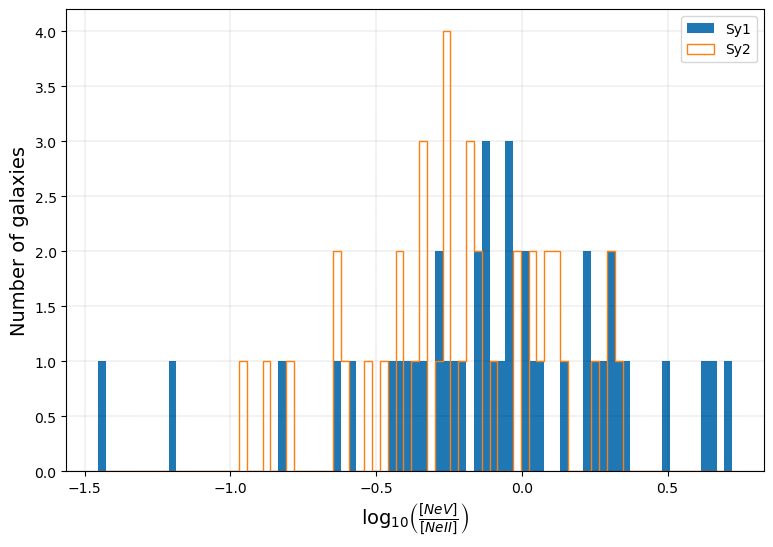

In [13]:
bins_NeVNeII_Sy = np.linspace(min(NeVNeII_Sy['log_[NeV]/[NeII]']),max(NeVNeII_Sy['log_[NeV]/[NeII]']),len(NeVNeII_Sy))
plt.figure(figsize=(9,6))
plt.hist(NeVNeII_Sy1['log_[NeV]/[NeII]'], bins=bins_NeVNeII_Sy, label='Sy1')
plt.hist(NeVNeII_Sy2['log_[NeV]/[NeII]'], bins=bins_NeVNeII_Sy, histtype='step', label='Sy2')
#plt.hist(NeVNeII_SyG['log_[NeV]/[NeII]'], bins=bins_NeVNeII_Sy, histtype='step', label='SyG')
plt.xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.legend()
plt.grid(color='k', linestyle='--', linewidth=0.1)
plt.savefig(path_graphs+'hist_NeV_NeII_Sy.jpg')

## [NeV]/[NeII] vs AGN Fraction

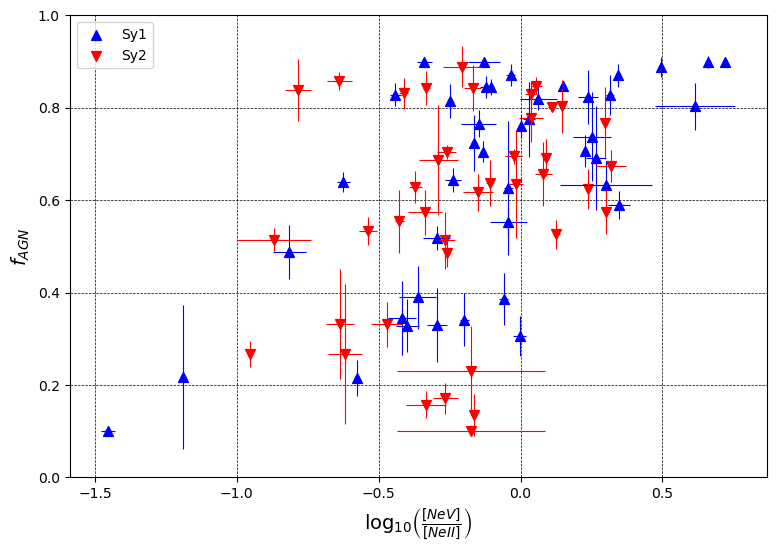

In [14]:
plt.figure(figsize=(9,6))
#plt.title(r'$f_{AGN}$ vs $\frac{[NeV]}{[NeII]}$', fontsize=14)
plt.scatter(NeVNeII_Sy1['log_[NeV]/[NeII]'],NeVNeII_Sy1['bayes.agn.fracAGN'],50,color='blue',marker = '^',label='Sy1')
plt.errorbar(NeVNeII_Sy1['log_[NeV]/[NeII]'], NeVNeII_Sy1['bayes.agn.fracAGN'],\
             NeVNeII_Sy1['bayes.agn.fracAGN_err'], NeVNeII_Sy1['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='b.')
plt.scatter(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['bayes.agn.fracAGN'],50,color='red', marker = 'v', label='Sy2')
plt.errorbar(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['bayes.agn.fracAGN'],\
             NeVNeII_Sy2['bayes.agn.fracAGN_err'], NeVNeII_Sy2['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='r.')
#plt.scatter(NeVNeII_SyG['log_[NeV]/[NeII]'], NeVNeII_SyG['bayes.agn.fracAGN'],120, color='black', marker = '.', label='SyG')
#plt.errorbar(NeVNeII_SyG['log_[NeV]/[NeII]'], NeVNeII_SyG['bayes.agn.fracAGN'],\
#             NeVNeII_SyG['bayes.agn.fracAGN_err'], NeVNeII_SyG['log_[NeV]/[NeII]_err'], fmt='k.')
plt.xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$',fontsize=14)
plt.ylabel(r'$f_{AGN}$',fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy.jpg')

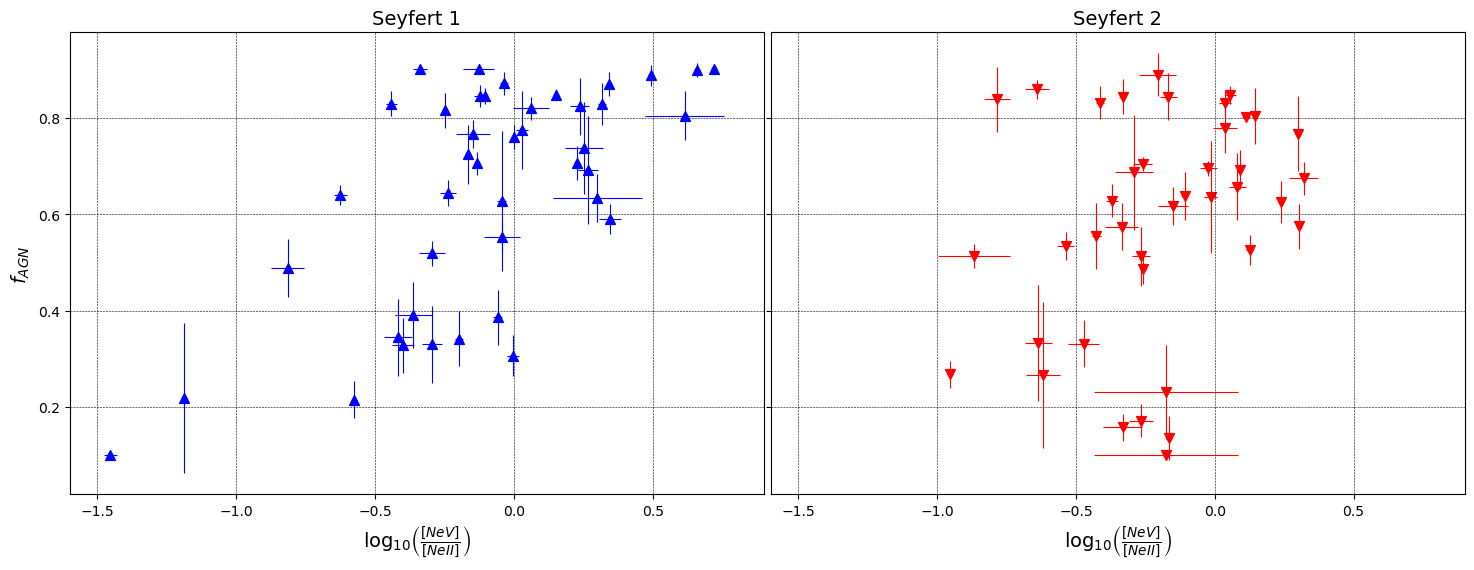

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),sharey=True)
#fig.suptitle(r'$f_{AGN}$ vs $\frac{[NeV]}{[NeII]}$', fontsize=16)
ax1.scatter(NeVNeII_Sy1['log_[NeV]/[NeII]'],NeVNeII_Sy1['bayes.agn.fracAGN'],50,color='blue',marker = '^')
ax1.errorbar(NeVNeII_Sy1['log_[NeV]/[NeII]'], NeVNeII_Sy1['bayes.agn.fracAGN'],\
             NeVNeII_Sy1['bayes.agn.fracAGN_err'], NeVNeII_Sy1['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='b.')
ax1.set_xlim(-1.6,0.9)#ax1.set_xlim(20e-3,10e0) 
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['bayes.agn.fracAGN'],50, color='red', marker = 'v')
ax2.errorbar(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['bayes.agn.fracAGN'],\
             NeVNeII_Sy2['bayes.agn.fracAGN_err'], NeVNeII_Sy2['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='r.')
ax2.set_xlim(-1.6,0.9)#ax2.set_xlim(20e-3,10e0)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

## Correlation coefficient between [NeV]/[NeII] and AGN Fraction

In [16]:
NeVNeII_corr_fracAGN_Sy = df_NeVNeII_Sy['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy['bayes.agn.fracAGN'])
NeVNeII_corr_fracAGN_Sy1 = df_NeVNeII_Sy1['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy1['bayes.agn.fracAGN'])
NeVNeII_corr_fracAGN_Sy2 = df_NeVNeII_Sy2['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy2['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:')
print('Total Sample: ',NeVNeII_corr_fracAGN_Sy)
print('Seyfert 1: ',NeVNeII_corr_fracAGN_Sy1)
print('Seyfert 2: ',NeVNeII_corr_fracAGN_Sy2)

Pearson's correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:
Total Sample:  0.5117530389435667
Seyfert 1:  0.6576009304823218
Seyfert 2:  0.29270448964694584


Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 66 of 82
Number of samples: 10000
Median: 0.5123666099679892
Mean: 0.506864377719595
Variance: 0.00897487985088433
Standard Desviation: 0.09473584248258063
90% confidence interval: 0.34159787496164784 - 0.6534331407010591


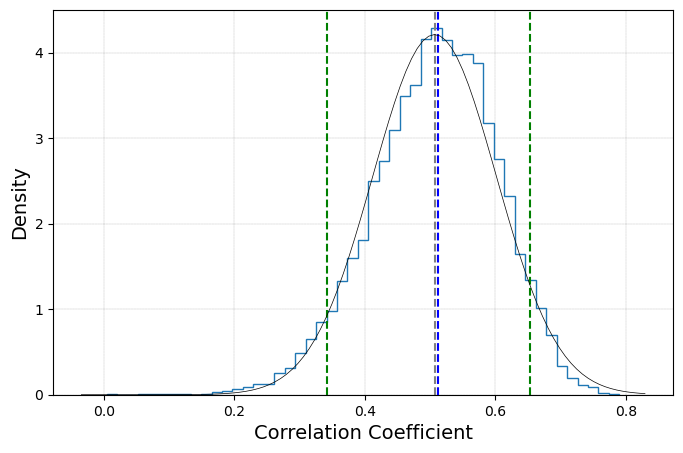

In [17]:
NeVNeII_fracAGN_Sy = BootstrapCorr(10000,0.8,df_NeVNeII_Sy,'log_[NeV]/[NeII]','bayes.agn.fracAGN',histo=True)

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 34 of 42
Number of samples: 10000
Median: 0.6557477105121429
Mean: 0.6404457844213143
Variance: 0.012636700217870955
Standard Desviation: 0.11241307850010583
90% confidence interval: 0.4298306471479573 - 0.7958171775463542


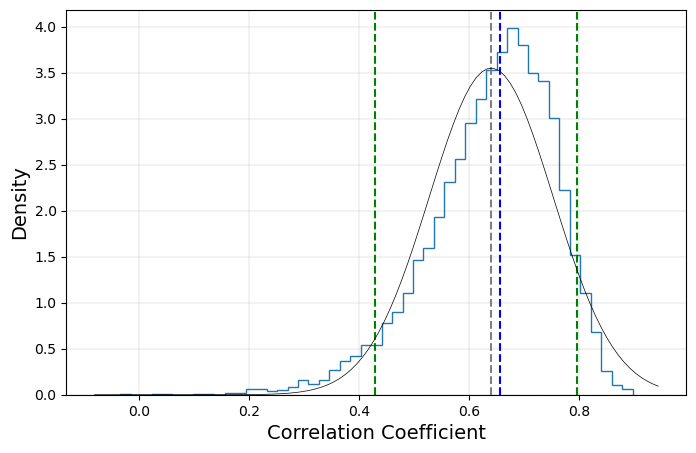

In [18]:
NeVNeII_fracAGN_Sy1 = BootstrapCorr(10000,0.8,df_NeVNeII_Sy1,'log_[NeV]/[NeII]','bayes.agn.fracAGN',histo=True)

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 32 of 40
Number of samples: 10000
Median: 0.2976575854622058
Mean: 0.2944373407020673
Variance: 0.02196283159571272
Standard Desviation: 0.14819862211138374
90% confidence interval: 0.04523250535357726 - 0.5294153783350275


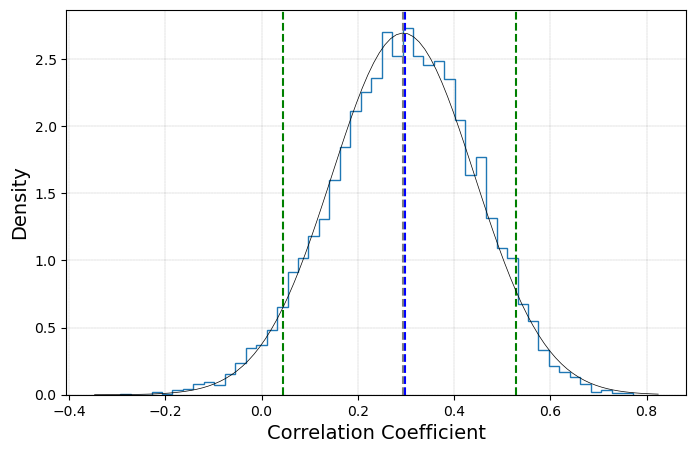

In [19]:
NeVNeII_fracAGN_Sy2 = BootstrapCorr(10000,0.8,df_NeVNeII_Sy2,'log_[NeV]/[NeII]','bayes.agn.fracAGN',histo=True)

## [NeV]/[NeII] vs other variables (outputs from CIGALE)

### SFR

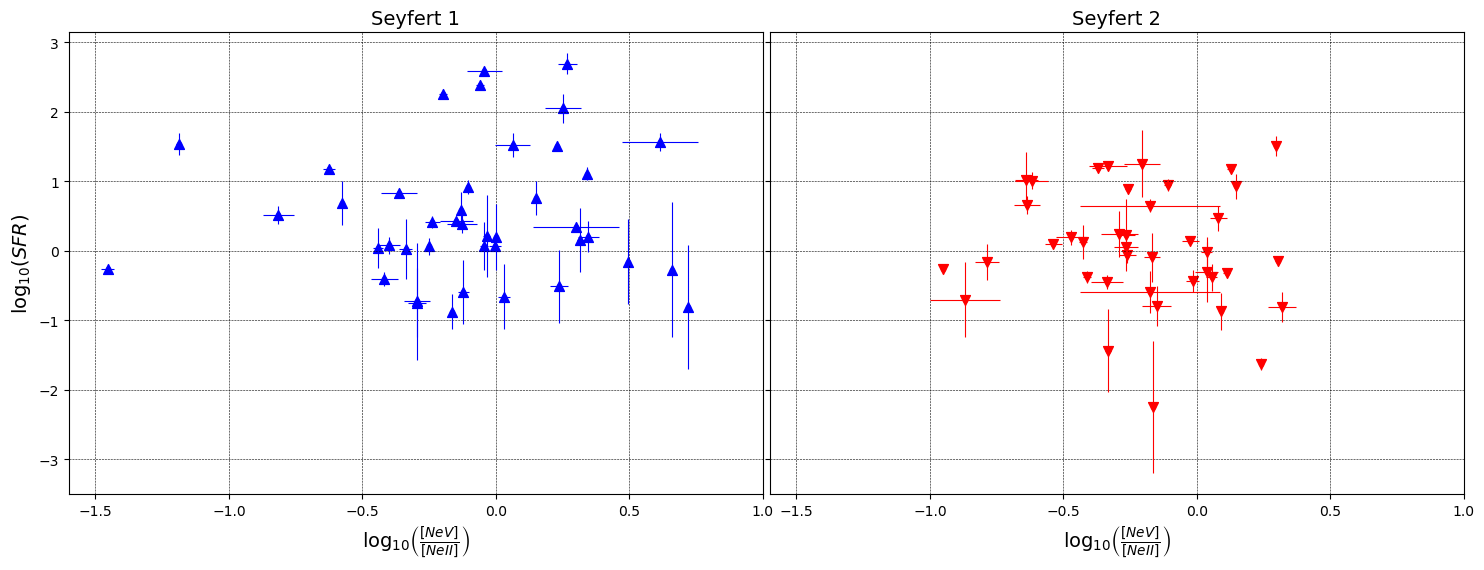

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),sharey=True)
#fig.suptitle(r'$SFR$ vs $\frac{[NeV]}{[NeII]}$', fontsize=16)
ax1.scatter(NeVNeII_Sy1['log_[NeV]/[NeII]'],NeVNeII_Sy1['log_bayes.sfh.sfr'],50,color='blue',marker = '^')
ax1.errorbar(NeVNeII_Sy1['log_[NeV]/[NeII]'], NeVNeII_Sy1['log_bayes.sfh.sfr'],\
             NeVNeII_Sy1['log_bayes.sfh.sfr_err'], NeVNeII_Sy1['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='b.')
ax1.set_xlim(-1.6,1)
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'$\log_{10}(SFR)$', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['log_bayes.sfh.sfr'],50, color='red', marker = 'v')
ax2.errorbar(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['log_bayes.sfh.sfr'],\
             NeVNeII_Sy2['log_bayes.sfh.sfr_err'], NeVNeII_Sy2['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='r.')
ax2.set_xlim(-1.6,1)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots
plt.savefig(path_graphs+'NeV_NeII_vs_sfr_Sy1_vs_Sy2.jpg')

**Correlation:**

In [21]:
NeVNeII_corr_SFR_Sy = df_NeVNeII_Sy['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy['log_bayes.sfh.sfr'])
NeVNeII_corr_SFR_Sy1 = df_NeVNeII_Sy1['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy1['log_bayes.sfh.sfr'])
NeVNeII_corr_SFR_Sy2 = df_NeVNeII_Sy2['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy2['log_bayes.sfh.sfr'])

print('\nPearson\'s correlation coefficient between [NeV]/[NeII] ratio and Star Forming Rate:')
print('Total Sample: ',NeVNeII_corr_SFR_Sy)
print('Seyfert 1: ',NeVNeII_corr_SFR_Sy1)
print('Seyfert 2: ',NeVNeII_corr_SFR_Sy2)


Pearson's correlation coefficient between [NeV]/[NeII] ratio and Star Forming Rate:
Total Sample:  0.032358634951446724
Seyfert 1:  0.039911514993654175
Seyfert 2:  -0.08220104651402141


Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y log_bayes.sfh.sfr :
Samples lenght: 82 of 82
Number of samples: 10000
Median: 0.03244373100301151
Mean: 0.03205029201487954
Variance: 0.01131510196451727
Standard Desviation: 0.10637246807570683
90% confidence interval: -0.1467966675607264 - 0.2046844250240984


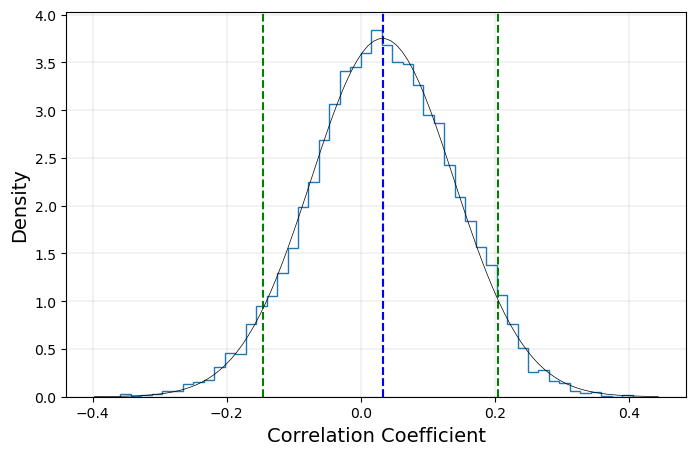

In [22]:
NeVNeII_SFR_Sy = BootstrapCorr(10000,1,df_NeVNeII_Sy,'log_[NeV]/[NeII]','log_bayes.sfh.sfr',histo=True)

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y log_bayes.sfh.sfr :
Samples lenght: 42 of 42
Number of samples: 10000
Median: 0.04335159147814069
Mean: 0.03910416393097381
Variance: 0.022561278717215954
Standard Desviation: 0.15020412350270532
90% confidence interval: -0.21571784848778508 - 0.2796173147977371


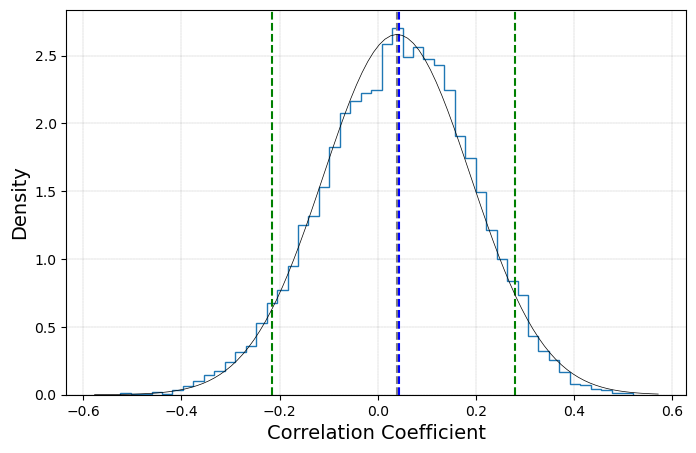

In [23]:
NeVNeII_SFR_Sy1 = BootstrapCorr(10000,1,df_NeVNeII_Sy1,'log_[NeV]/[NeII]','log_bayes.sfh.sfr',histo=True)

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y log_bayes.sfh.sfr :
Samples lenght: 40 of 40
Number of samples: 10000
Median: -0.08586434237184704
Mean: -0.08475229055014553
Variance: 0.024553686642943648
Standard Desviation: 0.1566961602686666
90% confidence interval: -0.3446886179698418 - 0.1691958227994238


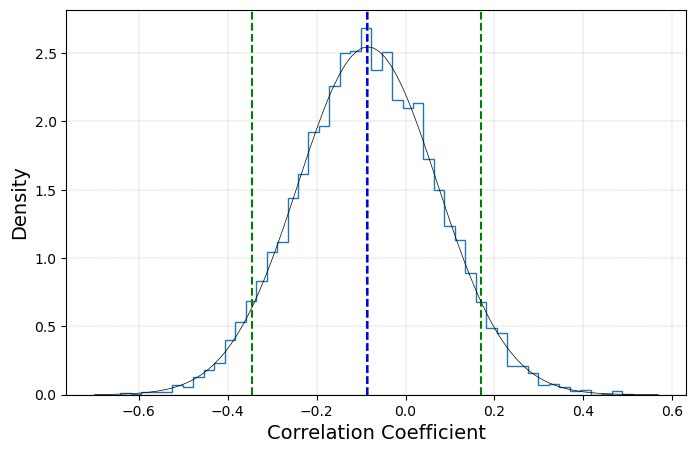

In [24]:
NeVNeII_SFR_Sy2 = BootstrapCorr(10000,1,df_NeVNeII_Sy2,'log_[NeV]/[NeII]','log_bayes.sfh.sfr',histo=True)

### Star Mass

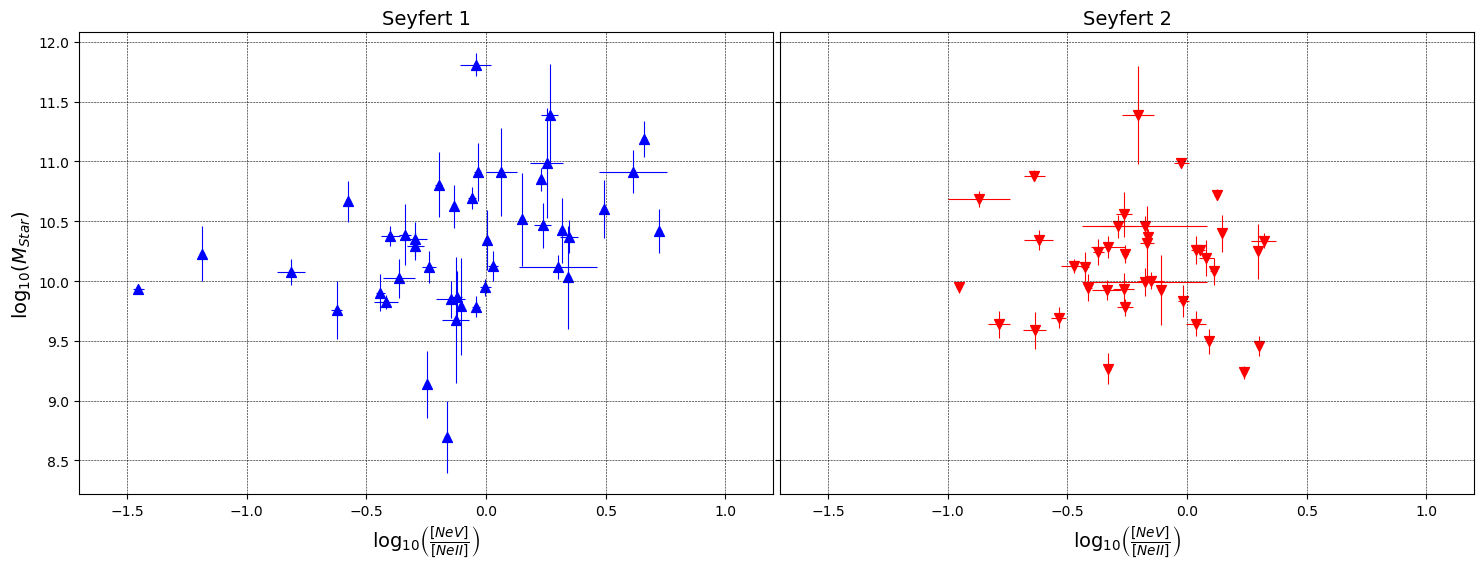

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),sharey=True)
#fig.suptitle(r'$M_{star}$ vs $\frac{[NeV]}{[NeII]}$', fontsize=16)
ax1.scatter(NeVNeII_Sy1['log_[NeV]/[NeII]'],NeVNeII_Sy1['log_bayes.stellar.m_star'],50,color='blue',marker = '^')
ax1.errorbar(NeVNeII_Sy1['log_[NeV]/[NeII]'], NeVNeII_Sy1['log_bayes.stellar.m_star'],\
             NeVNeII_Sy1['log_bayes.stellar.m_star_err'], NeVNeII_Sy1['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='b.')
ax1.set_xlim(-1.7,1.2)
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'$\log_{10}(M_{Star})$', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['log_bayes.stellar.m_star'],50, color='red', marker = 'v')
ax2.errorbar(NeVNeII_Sy2['log_[NeV]/[NeII]'], NeVNeII_Sy2['log_bayes.stellar.m_star'],\
             NeVNeII_Sy2['log_bayes.stellar.m_star_err'], NeVNeII_Sy2['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='r.')
ax2.set_xlim(-1.7,1.2)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots

**Correlation:**

In [26]:
NeVNeII_corr_m_star_Sy = df_NeVNeII_Sy['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy['log_bayes.stellar.m_star'])
NeVNeII_corr_m_star_Sy1 = df_NeVNeII_Sy1['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy1['log_bayes.stellar.m_star'])
NeVNeII_corr_m_star_Sy2 = df_NeVNeII_Sy2['log_[NeV]/[NeII]'].corr(df_NeVNeII_Sy2['log_bayes.stellar.m_star'])

print('\nPearson\'s correlation coefficient between [NeV]/[NeII] ratio and Star Mass:')
print('Total Sample: ',NeVNeII_corr_m_star_Sy)
print('Seyfert 1: ',NeVNeII_corr_m_star_Sy1)
print('Seyfert 2: ',NeVNeII_corr_m_star_Sy2)


Pearson's correlation coefficient between [NeV]/[NeII] ratio and Star Mass:
Total Sample:  0.23862348785855922
Seyfert 1:  0.36543437601265155
Seyfert 2:  -0.051934160313952725


Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y log_bayes.stellar.m_star :
Samples lenght: 82 of 82
Number of samples: 10000
Median: 0.24090190702326164
Mean: 0.2401608661208557
Variance: 0.008031159347187298
Standard Desviation: 0.08961673586550281
90% confidence interval: 0.09162713481990543 - 0.3852408883246013


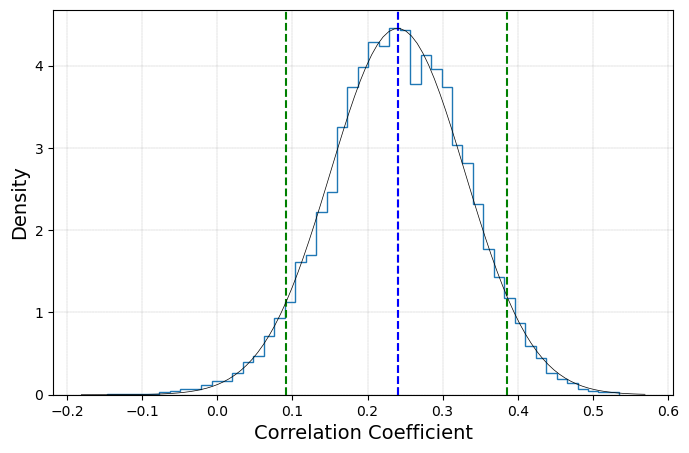

In [27]:
NeVNeII_m_star_Sy = BootstrapCorr(10000,1,df_NeVNeII_Sy,'log_[NeV]/[NeII]','log_bayes.stellar.m_star',histo=True)

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y log_bayes.stellar.m_star :
Samples lenght: 42 of 42
Number of samples: 10000
Median: 0.3737319702881923
Mean: 0.37368028977151785
Variance: 0.0072987346193701995
Standard Desviation: 0.08543263205222112
90% confidence interval: 0.234714901136309 - 0.5132095936796023


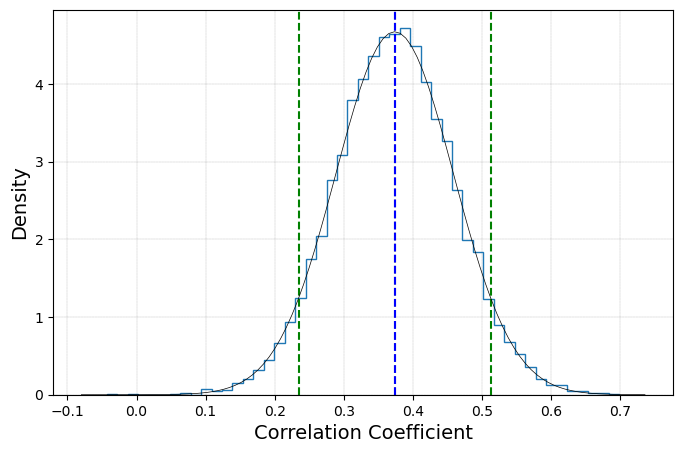

In [28]:
NeVNeII_m_star_Sy1 = BootstrapCorr(10000,1,df_NeVNeII_Sy1,'log_[NeV]/[NeII]','log_bayes.stellar.m_star',histo=True)

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y log_bayes.stellar.m_star :
Samples lenght: 40 of 40
Number of samples: 10000
Median: -0.05150380031900684
Mean: -0.04892513208398727
Variance: 0.02822333947890335
Standard Desviation: 0.16799803415190118
90% confidence interval: -0.3208711893079535 - 0.2298925667833923


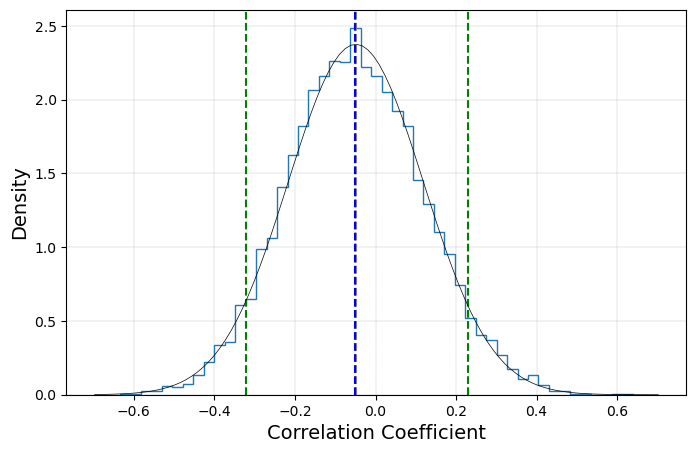

In [29]:
NeVNeII_m_star_Sy2 = BootstrapCorr(10000,1,df_NeVNeII_Sy2,'log_[NeV]/[NeII]','log_bayes.stellar.m_star',histo=True)

## Correlations Matrix

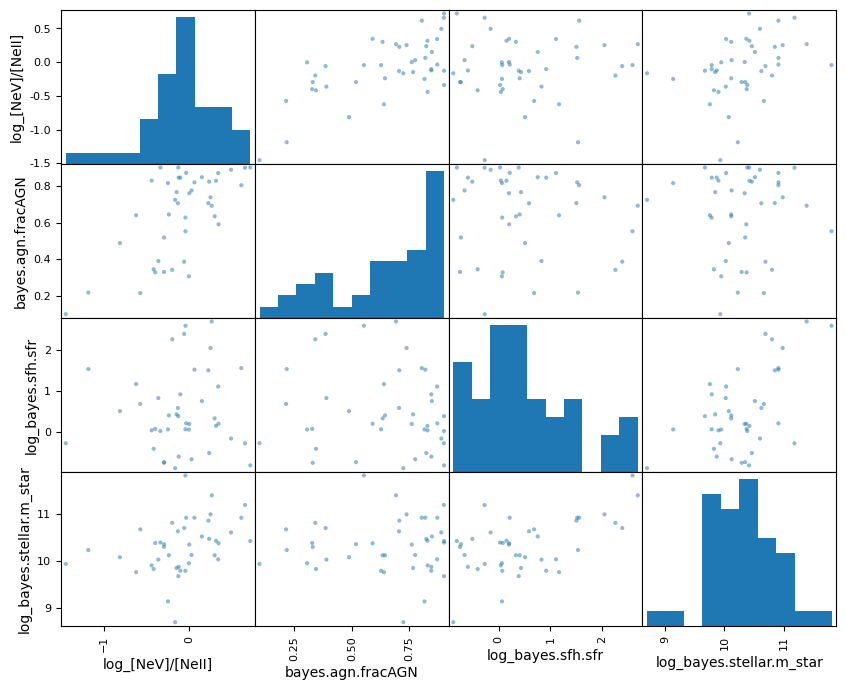

In [30]:
attributes=['log_[NeV]/[NeII]','bayes.agn.fracAGN','log_bayes.sfh.sfr','log_bayes.stellar.m_star']
scatMatrix_Sy1=pd.plotting.scatter_matrix(df_NeVNeII_Sy1[attributes], figsize=(10,8))

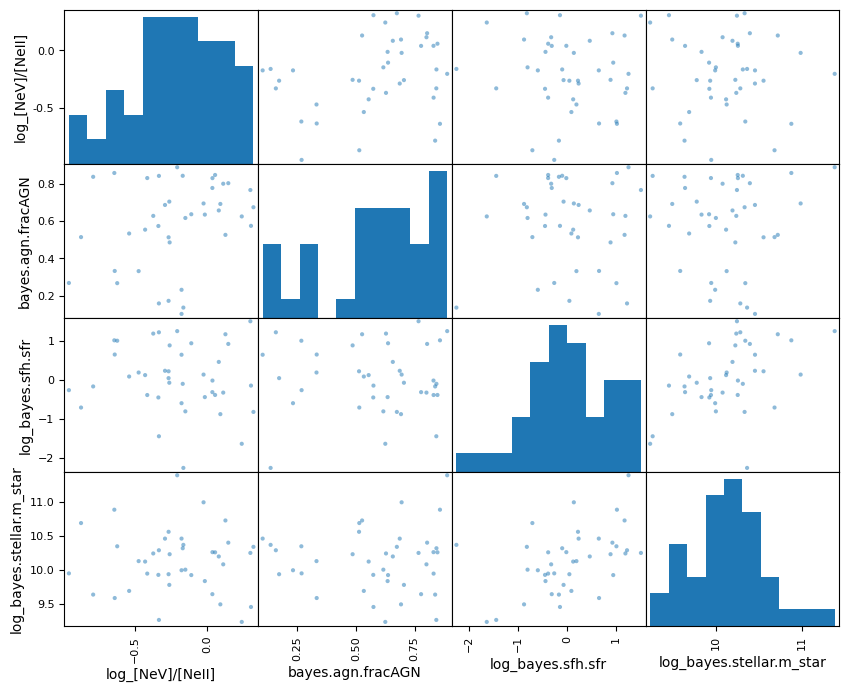

In [31]:
scatMatrix_Sy2=pd.plotting.scatter_matrix(df_NeVNeII_Sy2[attributes], figsize=(10,8))

--------------------------------------

# [NeV]/[NeIII]

In [32]:
print('From the', len(NeVNeIII_Sy),'galaxies with [NeV]/[NeIII] info:')
print(len(NeVNeIII_Sy1),'galaxies are Seyfert 1,')
print(len(NeVNeIII_Sy2),'galaxies are Seyfert 2,')

From the 80 galaxies with [NeV]/[NeIII] info:
36 galaxies are Seyfert 1,
44 galaxies are Seyfert 2,


## Histogram

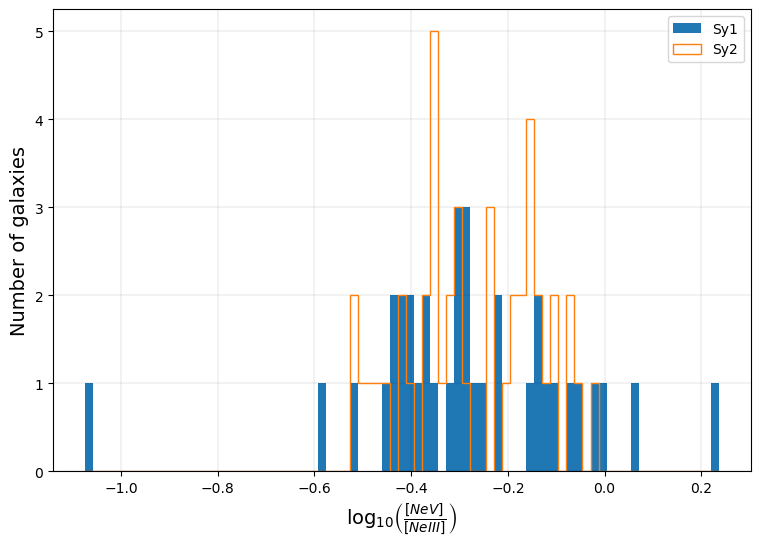

In [33]:
bins_NeVNeIII_Sy = np.linspace(min(NeVNeIII_Sy['log_[NeV]/[NeIII]']),max(NeVNeIII_Sy['log_[NeV]/[NeIII]']),len(NeVNeIII_Sy))
plt.figure(figsize=(9,6))
plt.hist(NeVNeIII_Sy1['log_[NeV]/[NeIII]'], bins=bins_NeVNeIII_Sy, label='Sy1')
plt.hist(NeVNeIII_Sy2['log_[NeV]/[NeIII]'], bins=bins_NeVNeIII_Sy, histtype='step', label='Sy2')
#plt.hist(NeVNeIII_SyG['log_[NeV]/[NeIII]'], bins=bins_NeVNeIII_Sy, histtype='step', label='SyG')
plt.xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeIII]}\right)$',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.1)
plt.legend()
plt.savefig(path_graphs+'hist_NeV_NeIII_Sy.jpg')

## [NeV]/[NeIII] vs AGN Fraction

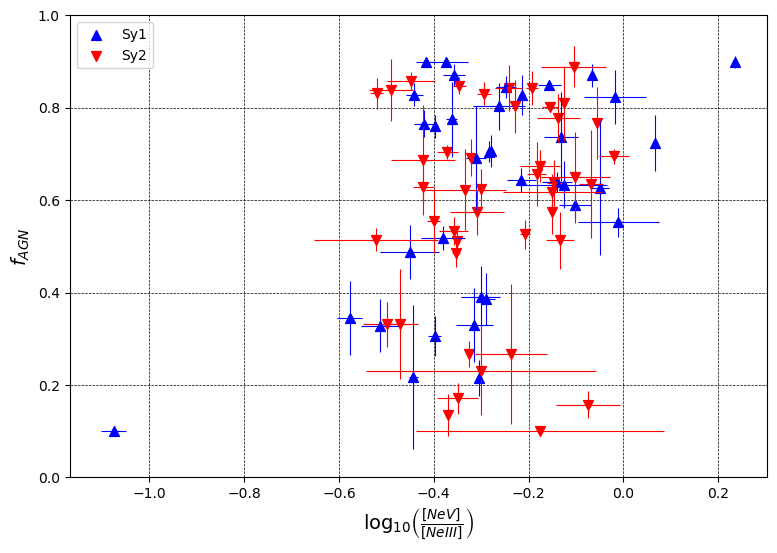

In [34]:
plt.figure(figsize=(9,6))
#plt.title(r'$f_{AGN}$ vs $\frac{[NeV]}{[NeIII]}$', fontsize=14)
plt.scatter(NeVNeIII_Sy1['log_[NeV]/[NeIII]'],NeVNeIII_Sy1['bayes.agn.fracAGN'],50,color='blue',marker = '^',label='Sy1')
plt.errorbar(NeVNeIII_Sy1['log_[NeV]/[NeIII]'], NeVNeIII_Sy1['bayes.agn.fracAGN'],\
             NeVNeIII_Sy1['bayes.agn.fracAGN_err'], NeVNeIII_Sy1['log_[NeV]/[NeIII]_err'],elinewidth=0.8,fmt='b.')
plt.scatter(NeVNeIII_Sy2['log_[NeV]/[NeIII]'], NeVNeIII_Sy2['bayes.agn.fracAGN'],50,color='red', marker = 'v', label='Sy2')
plt.errorbar(NeVNeIII_Sy2['log_[NeV]/[NeIII]'], NeVNeIII_Sy2['bayes.agn.fracAGN'],\
             NeVNeIII_Sy2['bayes.agn.fracAGN_err'], NeVNeIII_Sy2['log_[NeV]/[NeIII]_err'],elinewidth=0.8,fmt='r.')
#plt.scatter(NeVNeIII_SyG['log_[NeV]/[NeIII]'], NeVNeIII_SyG['bayes.agn.fracAGN'], color='black', marker = '.', label='SyG')
#plt.errorbar(NeVNeIII_SyG['log_[NeV]/[NeIII]'], NeVNeIII_SyG['bayes.agn.fracAGN'],\
#             NeVNeIII_SyG['bayes.agn.fracAGN_err'], NeVNeIII_SyG['log_[NeV]/[NeIII]_err'], fmt='k.')
plt.xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeIII]}\right)$',fontsize=14)
plt.ylabel(r'$f_{AGN}$',fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy.jpg')

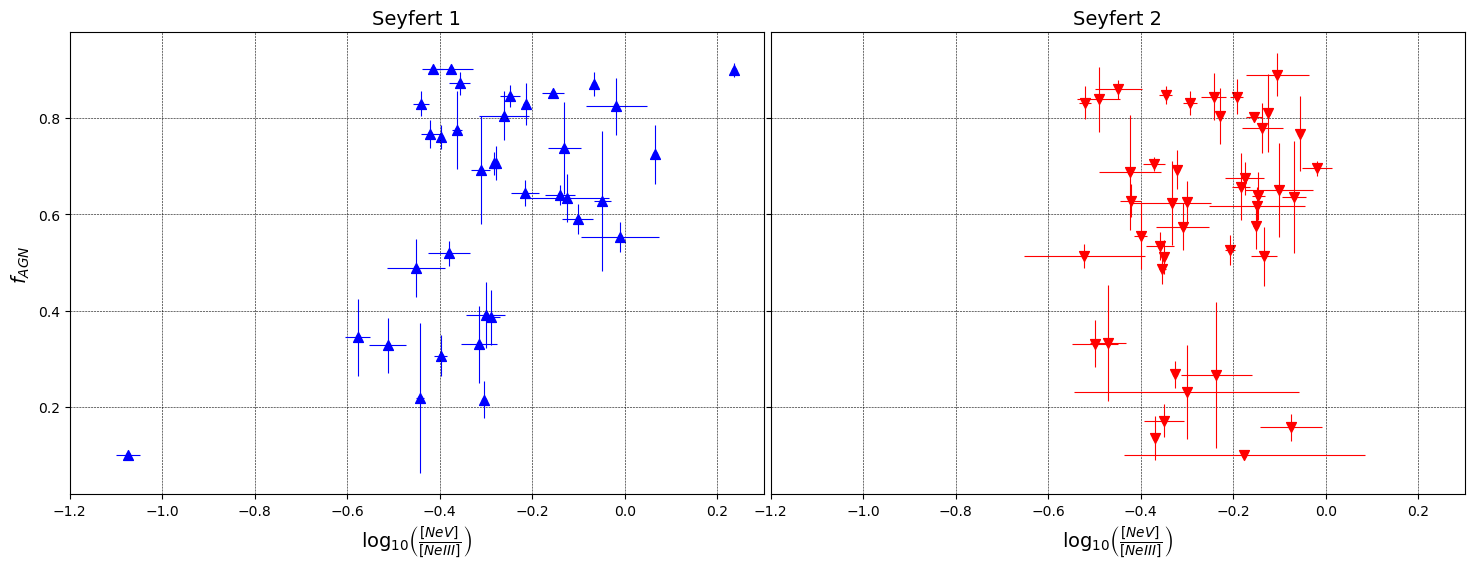

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),sharey=True)
#fig.suptitle(r'$f_{AGN}$ vs $\frac{[NeV]}{[NeIII]}$', fontsize=16)
ax1.scatter(NeVNeIII_Sy1['log_[NeV]/[NeIII]'],NeVNeIII_Sy1['bayes.agn.fracAGN'],50,color='blue',marker = '^')
ax1.errorbar(NeVNeIII_Sy1['log_[NeV]/[NeIII]'], NeVNeIII_Sy1['bayes.agn.fracAGN'],\
             NeVNeIII_Sy1['bayes.agn.fracAGN_err'], NeVNeIII_Sy1['log_[NeV]/[NeIII]_err'],elinewidth=0.8,fmt='b.')
ax1.set_xlim(-1.2,0.3)#ax1.set_xlim(20e-3,10e0) 
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeIII]}\right)$', fontsize=14)
ax1.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(NeVNeIII_Sy2['log_[NeV]/[NeIII]'], NeVNeIII_Sy2['bayes.agn.fracAGN'],50, color='red', marker = 'v')
ax2.errorbar(NeVNeIII_Sy2['log_[NeV]/[NeIII]'], NeVNeIII_Sy2['bayes.agn.fracAGN'],\
             NeVNeIII_Sy2['bayes.agn.fracAGN_err'], NeVNeIII_Sy2['log_[NeV]/[NeIII]_err'],elinewidth=0.8,fmt='r.')
ax2.set_xlim(-1.2,0.3)#ax2.set_xlim(20e-3,10e0)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeIII]}\right)$', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots
plt.savefig(path_graphs+'NeV_NeIII_vs_fracAGN_Sy1_vs_Sy2.jpg')

## Correlation coefficient between [NeV]/[NeIII] and AGN Fraction

In [36]:
NeVNeIII_corr_fracAGN_Sy = df_NeVNeIII_Sy['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy['bayes.agn.fracAGN'])
NeVNeIII_corr_fracAGN_Sy1 = df_NeVNeIII_Sy1['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy1['bayes.agn.fracAGN'])
NeVNeIII_corr_fracAGN_Sy2 = df_NeVNeIII_Sy2['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy2['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeV]/[NeIII] ratio and AGN fraction:')
print('Total Sample: ',NeVNeIII_corr_fracAGN_Sy)
print('Seyfert 1: ',NeVNeIII_corr_fracAGN_Sy1)
print('Seyfert 2: ',NeVNeIII_corr_fracAGN_Sy2)

Pearson's correlation coefficient between [NeV]/[NeIII] ratio and AGN fraction:
Total Sample:  0.327751465534536
Seyfert 1:  0.5098878980360981
Seyfert 2:  0.1121293293937291


In [37]:
NeVNeIII_fracAGN_Sy = BootstrapCorr(10000,0.8,df_NeVNeIII_Sy,'log_[NeV]/[NeIII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeIII] y bayes.agn.fracAGN :
Samples lenght: 64 of 80
Number of samples: 10000
Median: 0.3233103573308582
Mean: 0.3151367454240185
Variance: 0.01722570789202553
Standard Desviation: 0.13124674431019434
90% confidence interval: 0.08670359292629176 - 0.5165037664981398


In [38]:
NeVNeIII_fracAGN_Sy1 = BootstrapCorr(10000,0.8,df_NeVNeIII_Sy1,'log_[NeV]/[NeIII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeIII] y bayes.agn.fracAGN :
Samples lenght: 29 of 36
Number of samples: 10000
Median: 0.5033219840133447
Mean: 0.47888837961935016
Variance: 0.02759156338989384
Standard Desviation: 0.16610708410508518
90% confidence interval: 0.16430079510426207 - 0.7081896794692014


In [39]:
NeVNeIII_fracAGN_Sy2 = BootstrapCorr(10000,1,df_NeVNeIII_Sy2,'log_[NeV]/[NeIII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeIII] y bayes.agn.fracAGN :
Samples lenght: 44 of 44
Number of samples: 10000
Median: 0.11722336045609608
Mean: 0.11679676460211658
Variance: 0.022137057463006704
Standard Desviation: 0.14878527300444322
90% confidence interval: -0.12808805943796767 - 0.3592751135669159


## [NeV]/[NeIII] vs other variables (outputs from CIGALE)

In [40]:
NeVNeIII_corr_SFR_Sy = df_NeVNeIII_Sy['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy['log_bayes.sfh.sfr'])
NeVNeIII_corr_SFR_Sy1 = df_NeVNeIII_Sy1['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy1['log_bayes.sfh.sfr'])
NeVNeIII_corr_SFR_Sy2 = df_NeVNeIII_Sy2['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy2['log_bayes.sfh.sfr'])

NeVNeIII_corr_m_star_Sy = df_NeVNeIII_Sy['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy['log_bayes.stellar.m_star'])
NeVNeIII_corr_m_star_Sy1 = df_NeVNeIII_Sy1['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy1['log_bayes.stellar.m_star'])
NeVNeIII_corr_m_star_Sy2 = df_NeVNeIII_Sy2['log_[NeV]/[NeIII]'].corr(df_NeVNeIII_Sy2['log_bayes.stellar.m_star'])

print('\nPearson\'s correlation coefficient between [NeV]/[NeIII] ratio and Star Forming Rate:')
print('Total Sample: ',NeVNeIII_corr_SFR_Sy)
print('Seyfert 1: ',NeVNeIII_corr_SFR_Sy1)
print('Seyfert 2: ',NeVNeIII_corr_SFR_Sy2)

print('\nPearson\'s correlation coefficient between [NeV]/[NeIII] ratio and Star Mass:')
print('Total Sample: ',NeVNeIII_corr_m_star_Sy)
print('Seyfert 1: ',NeVNeIII_corr_m_star_Sy1)
print('Seyfert 2: ',NeVNeIII_corr_m_star_Sy2)


Pearson's correlation coefficient between [NeV]/[NeIII] ratio and Star Forming Rate:
Total Sample:  0.13692390810612748
Seyfert 1:  0.11909150884527019
Seyfert 2:  0.19114565421232524

Pearson's correlation coefficient between [NeV]/[NeIII] ratio and Star Mass:
Total Sample:  0.16452100472139064
Seyfert 1:  0.17502263968013682
Seyfert 2:  0.16678596785220792


----------------------------------

# [NeIII]/[NeII]

In [41]:
print('From the', len(NeIIINeII_Sy),'galaxies with [NeIII]/[NeII] info:')
print(len(NeIIINeII_Sy1),'galaxies are Seyfert 1,')
print(len(NeIIINeII_Sy2),'galaxies are Seyfert 2,')

From the 83 galaxies with [NeIII]/[NeII] info:
40 galaxies are Seyfert 1,
43 galaxies are Seyfert 2,


## Histogram

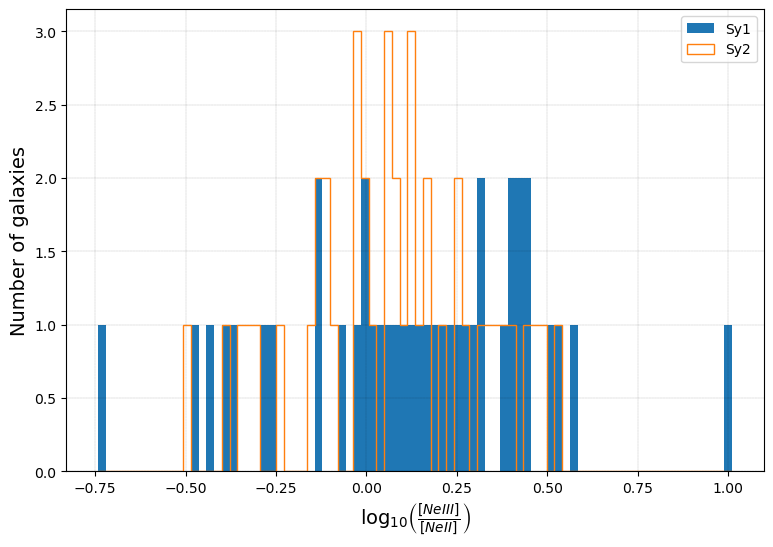

In [42]:
bins_NeIIINeII_Sy = np.linspace(min(NeIIINeII_Sy['log_[NeIII]/[NeII]']),max(NeIIINeII_Sy['log_[NeIII]/[NeII]']),len(NeIIINeII_Sy))
plt.figure(figsize=(9,6))
plt.hist(NeIIINeII_Sy1['log_[NeIII]/[NeII]'], bins=bins_NeIIINeII_Sy, label='Sy1')
plt.hist(NeIIINeII_Sy2['log_[NeIII]/[NeII]'], bins=bins_NeIIINeII_Sy, histtype='step', label='Sy2')
#plt.hist(NeIIINeII_SyG['log_[NeIII]/[NeII]'], bins=bins_NeIIINeII_Sy, histtype='step', label='SyG')
plt.xlabel(r'$\log_{10}\left(\frac{[NeIII]}{[NeII]}\right)$',fontsize=14)
plt.ylabel('Number of galaxies',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.1)
plt.legend()
plt.savefig(path_graphs+'hist_NeIII_NeII_Sy.jpg')

## [NeIII]/[NeII] vs AGN Fraction

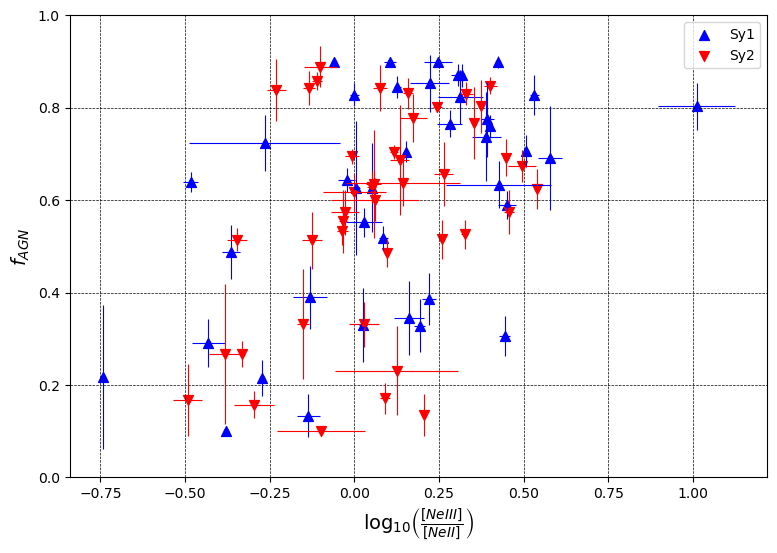

In [43]:
plt.figure(figsize=(9,6))
#plt.title(r'$f_{AGN}$ vs $\frac{[NeIII]}{[NeII]}$', fontsize=14)
plt.scatter(NeIIINeII_Sy1['log_[NeIII]/[NeII]'],NeIIINeII_Sy1['bayes.agn.fracAGN'],50,color='blue',marker = '^',label='Sy1')
plt.errorbar(NeIIINeII_Sy1['log_[NeIII]/[NeII]'], NeIIINeII_Sy1['bayes.agn.fracAGN'],\
             NeIIINeII_Sy1['bayes.agn.fracAGN_err'], NeIIINeII_Sy1['log_[NeIII]/[NeII]_err'],elinewidth=0.8,fmt='b.')
plt.scatter(NeIIINeII_Sy2['log_[NeIII]/[NeII]'], NeIIINeII_Sy2['bayes.agn.fracAGN'],50,color='red', marker = 'v', label='Sy2')
plt.errorbar(NeIIINeII_Sy2['log_[NeIII]/[NeII]'], NeIIINeII_Sy2['bayes.agn.fracAGN'],\
             NeIIINeII_Sy2['bayes.agn.fracAGN_err'], NeIIINeII_Sy2['log_[NeIII]/[NeII]_err'],elinewidth=0.8,fmt='r.')
#plt.scatter(NeIIINeII_SyG['log_[NeIII]/[NeII]'], NeIIINeII_SyG['bayes.agn.fracAGN'],color='black', marker = '.', label='SyG')
#plt.errorbar(NeIIINeII_SyG['log_[NeIII]/[NeII]'], NeIIINeII_SyG['bayes.agn.fracAGN'],\
#             NeIIINeII_SyG['bayes.agn.fracAGN_err'], NeIIINeII_SyG['log_[NeIII]/[NeII]_err'], fmt='k.')
plt.xlabel(r'$\log_{10}\left(\frac{[NeIII]}{[NeII]}\right)$',fontsize=14)
plt.ylabel(r'$f_{AGN}$',fontsize=14)
plt.ylim(0.0,1.0)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy.jpg')

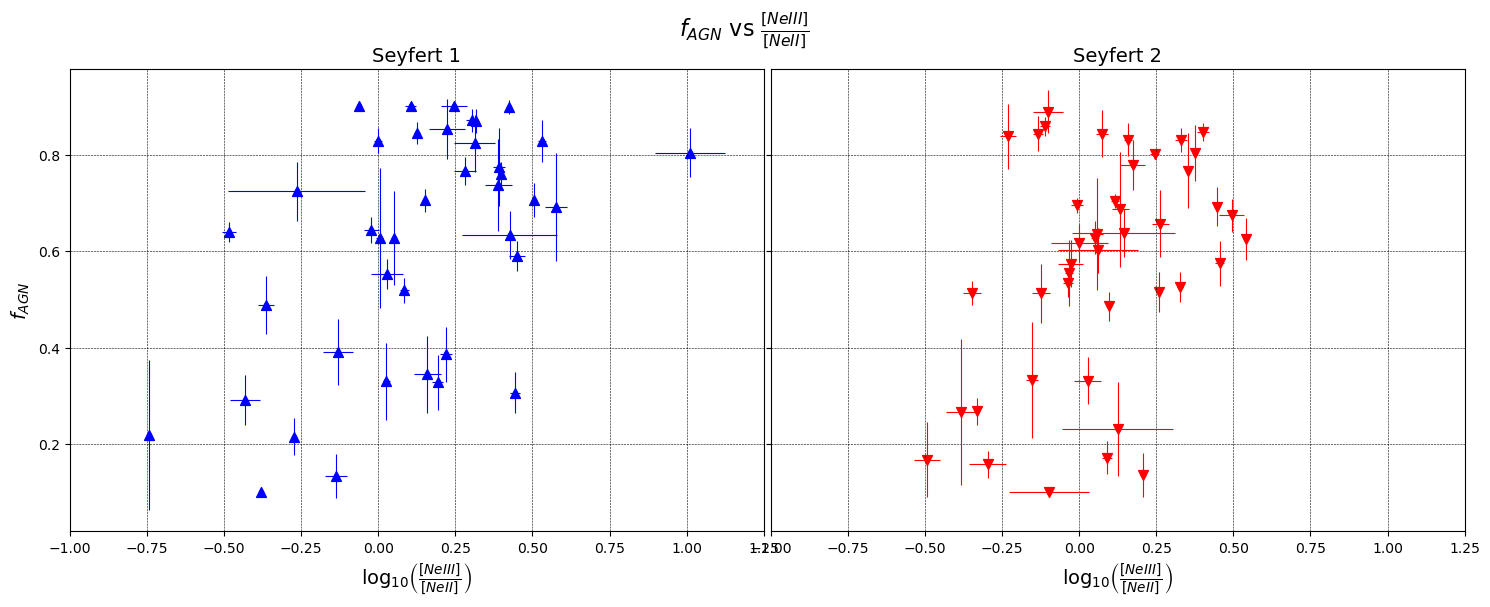

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),sharey=True)
fig.suptitle(r'$f_{AGN}$ vs $\frac{[NeIII]}{[NeII]}$', fontsize=16)
ax1.scatter(NeIIINeII_Sy1['log_[NeIII]/[NeII]'],NeIIINeII_Sy1['bayes.agn.fracAGN'],50,color='blue',marker = '^')
ax1.errorbar(NeIIINeII_Sy1['log_[NeIII]/[NeII]'], NeIIINeII_Sy1['bayes.agn.fracAGN'],\
             NeIIINeII_Sy1['bayes.agn.fracAGN_err'], NeIIINeII_Sy1['log_[NeIII]/[NeII]_err'],elinewidth=0.8,fmt='b.')
ax1.set_xlim(-1,1.25)#ax1.set_xlim(20e-3,10e0) 
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeIII]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(NeIIINeII_Sy2['log_[NeIII]/[NeII]'], NeIIINeII_Sy2['bayes.agn.fracAGN'],50, color='red', marker = 'v')
ax2.errorbar(NeIIINeII_Sy2['log_[NeIII]/[NeII]'], NeIIINeII_Sy2['bayes.agn.fracAGN'],\
             NeIIINeII_Sy2['bayes.agn.fracAGN_err'], NeIIINeII_Sy2['log_[NeIII]/[NeII]_err'],elinewidth=0.8,fmt='r.')
ax2.set_xlim(-1,1.25)#ax2.set_xlim(20e-3,10e0)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeIII]}{[NeII]}\right)$', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots
plt.savefig(path_graphs+'NeIII_NeII_vs_fracAGN_Sy1_vs_Sy2.jpg')

## Correlation coefficient between [NeIII]/[NeII] and AGN Fraction

In [45]:
NeIIINeII_corr_fracAGN_Sy = df_NeIIINeII_Sy['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy['bayes.agn.fracAGN'])
NeIIINeII_corr_fracAGN_Sy1 = df_NeIIINeII_Sy1['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy1['bayes.agn.fracAGN'])
NeIIINeII_corr_fracAGN_Sy2 = df_NeIIINeII_Sy2['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy2['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeIII]/[NeII] ratio and AGN fraction:')
print('Total Sample: ',NeIIINeII_corr_fracAGN_Sy)
print('Seyfert 1: ',NeIIINeII_corr_fracAGN_Sy1)
print('Seyfert 2: ',NeIIINeII_corr_fracAGN_Sy2)

Pearson's correlation coefficient between [NeIII]/[NeII] ratio and AGN fraction:
Total Sample:  0.47104560463652856
Seyfert 1:  0.5221240090117947
Seyfert 2:  0.40435529414965193


In [46]:
NeIIINeII_fracAGN_Sy = BootstrapCorr(10000,0.8,df_NeIIINeII_Sy,'log_[NeIII]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeIII]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 66 of 83
Number of samples: 10000
Median: 0.4748222211316149
Mean: 0.46946585776819594
Variance: 0.008681581380578446
Standard Desviation: 0.09317500405461997
90% confidence interval: 0.30531709546244273 - 0.6111332010096775


In [47]:
NeIIINeII_fracAGN_Sy1 = BootstrapCorr(10000,0.8,df_NeIIINeII_Sy1,'log_[NeIII]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeIII]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 32 of 40
Number of samples: 10000
Median: 0.5301022924879832
Mean: 0.5171153120556782
Variance: 0.015279861088316764
Standard Desviation: 0.12361173523705896
90% confidence interval: 0.2944053152832288 - 0.6970520790469799


In [48]:
NeIIINeII_fracAGN_Sy2 = BootstrapCorr(10000,0.8,df_NeIIINeII_Sy2,'log_[NeIII]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeIII]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 34 of 43
Number of samples: 10000
Median: 0.407180558912262
Mean: 0.3985533851185694
Variance: 0.022348209964687102
Standard Desviation: 0.14949317698372425
90% confidence interval: 0.13620347106372394 - 0.6300046757033754


## [NeIII]/[NeII] vs other variables (outputs from CIGALE)

In [49]:
NeIIINeII_corr_SFR_Sy = df_NeIIINeII_Sy['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy['log_bayes.sfh.sfr'])
NeIIINeII_corr_SFR_Sy1 = df_NeIIINeII_Sy1['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy1['log_bayes.sfh.sfr'])
NeIIINeII_corr_SFR_Sy2 = df_NeIIINeII_Sy2['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy2['log_bayes.sfh.sfr'])

NeIIINeII_corr_m_star_Sy = df_NeIIINeII_Sy['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy['log_bayes.stellar.m_star'])
NeIIINeII_corr_m_star_Sy1 = df_NeIIINeII_Sy1['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy1['log_bayes.stellar.m_star'])
NeIIINeII_corr_m_star_Sy2 = df_NeIIINeII_Sy2['log_[NeIII]/[NeII]'].corr(df_NeIIINeII_Sy2['log_bayes.stellar.m_star'])

print('\nPearson\'s correlation coefficient between [NeIII]/[NeII] ratio and Star Forming Rate:')
print('Total Sample: ',NeIIINeII_corr_SFR_Sy)
print('Seyfert 1: ',NeIIINeII_corr_SFR_Sy1)
print('Seyfert 2: ',NeIIINeII_corr_SFR_Sy2)

print('\nPearson\'s correlation coefficient between [NeIII]/[NeII] ratio and Star Mass:')
print('Total Sample: ',NeIIINeII_corr_m_star_Sy)
print('Seyfert 1: ',NeIIINeII_corr_m_star_Sy1)
print('Seyfert 2: ',NeIIINeII_corr_m_star_Sy2)


Pearson's correlation coefficient between [NeIII]/[NeII] ratio and Star Forming Rate:
Total Sample:  -0.08315321048588233
Seyfert 1:  0.008154627162793414
Seyfert 2:  -0.25891809017066697

Pearson's correlation coefficient between [NeIII]/[NeII] ratio and Star Mass:
Total Sample:  0.08700739945450907
Seyfert 1:  0.2905797350759824
Seyfert 2:  -0.26544656297084085


--------------------------

## Galaxies according to their viewing angle (i from CIGALE)

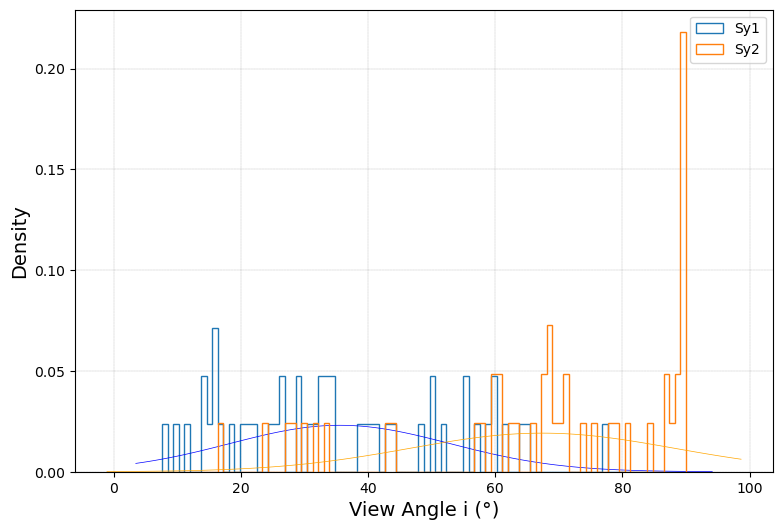

In [50]:
i_Sy1 = Ne_Sy1['bayes.agn.i']
i_Sy2 = Ne_Sy2['bayes.agn.i']
i_SyG = Ne_SyG['bayes.agn.i']
bins_Sy = np.linspace(min(Ne_Sy['bayes.agn.i']),max(Ne_Sy['bayes.agn.i']),len(Ne_Sy))
plt.figure(figsize=(9,6))
plt.hist(i_Sy1, bins=bins_Sy, density=True, histtype='step', label='Sy1')
# Plot the PDF.
mu1, std1 = norm.fit(i_Sy1)
xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin1, xmax1, 100)
p1 = norm.pdf(x1, mu1, std1)
plt.plot(x1, p1, 'b', linewidth=0.5)

plt.hist(i_Sy2, bins=bins_Sy, density=True, histtype='step', label='Sy2')
# Plot the PDF.
mu2, std2 = norm.fit(i_Sy2)
xmin2, xmax2 = plt.xlim()
x2 = np.linspace(xmin2, xmax2, 100)
p2 = norm.pdf(x2, mu2, std2)
plt.plot(x2, p2, 'orange', linewidth=0.5)

plt.xlabel(r'View Angle i (°)',fontsize=14)
plt.ylabel(r'Density',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.1)
plt.legend()
plt.savefig(path_graphs+'hist_view_angle.jpg')

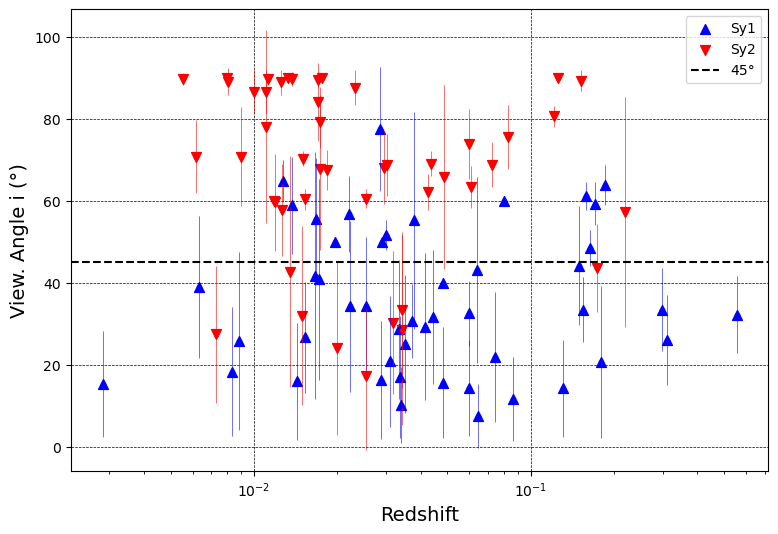

In [51]:
plt.figure(figsize=(9,6))
plt.scatter(Ne_Sy1['redshift'],Ne_Sy1['bayes.agn.i'],50,color='blue',marker = '^',label='Sy1')
plt.errorbar(Ne_Sy1['redshift'],Ne_Sy1['bayes.agn.i'],Ne_Sy1['bayes.agn.i_err'],elinewidth=0.4,fmt='b.')
plt.scatter(Ne_Sy2['redshift'], Ne_Sy2['bayes.agn.i'],50,color='red', marker = 'v',label='Sy2')
plt.errorbar(Ne_Sy2['redshift'],Ne_Sy2['bayes.agn.i'],Ne_Sy2['bayes.agn.i_err'],elinewidth=0.4,fmt='r.')

plt.axhline(y=45,ls='--',color='black', label='45°')

plt.xlabel(r'Redshift',fontsize=14)
plt.xscale('log')
plt.ylabel(r'View. Angle i (°)',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig(path_graphs+'view_angle_vs_redshift.jpg')

### Classifying the galaxies by their viewing angle:

In [52]:
AGN_T1 = Ne_Sy[Ne_Sy['bayes.agn.i']<45]
AGN_T2 = Ne_Sy[Ne_Sy['bayes.agn.i']>45]

df_AGN_T1 = AGN_T1.to_pandas()
df_AGN_T2 = AGN_T2.to_pandas()

In [53]:
print('For the',len(AGN_T1),'galaxies with i<45°,',len(AGN_T1[AGN_T1['otype']=='Sy1']),'are Seyfert 1 and',\
     len(AGN_T1[AGN_T1['otype']=='Sy2']),'are Seyfert 2')

print('For the',len(AGN_T2),'galaxies with i>45°,',len(AGN_T2[AGN_T2['otype']=='Sy2']),'are Seyfert 2 and',\
     len(AGN_T2[AGN_T2['otype']=='Sy1']),'are Seyfert 1')

For the 43 galaxies with i<45°, 34 are Seyfert 1 and 9 are Seyfert 2
For the 52 galaxies with i>45°, 38 are Seyfert 2 and 14 are Seyfert 1


### [NeV]/[NeII] vs $f_{AGN}$ by their viewing angle

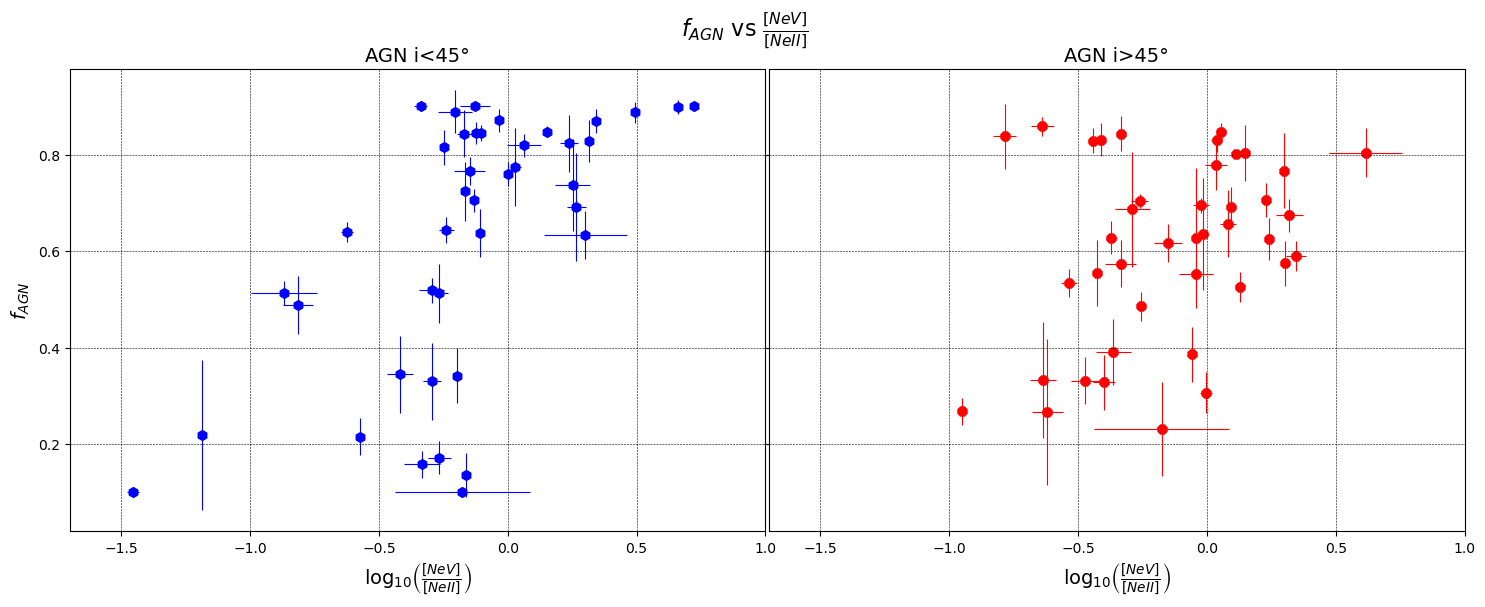

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),sharey=True)
fig.suptitle(r'$f_{AGN}$ vs $\frac{[NeV]}{[NeII]}$', fontsize=16)
ax1.scatter(AGN_T1['log_[NeV]/[NeII]'],AGN_T1['bayes.agn.fracAGN'],50,color='blue',marker = 'h')
ax1.errorbar(AGN_T1['log_[NeV]/[NeII]'], AGN_T1['bayes.agn.fracAGN'],\
             AGN_T1['bayes.agn.fracAGN_err'], AGN_T1['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='b.')
ax1.set_xlim(-1.7,1)
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax1.set_title('AGN i<45°', fontsize=14)
ax2.scatter(AGN_T2['log_[NeV]/[NeII]'], AGN_T2['bayes.agn.fracAGN'],50, color='red', marker = '8')
ax2.errorbar(AGN_T2['log_[NeV]/[NeII]'], AGN_T2['bayes.agn.fracAGN'],\
             AGN_T2['bayes.agn.fracAGN_err'], AGN_T2['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='r.')
ax2.set_xlim(-1.7,1)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax2.set_title('AGN i>45°', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots

In [55]:
NeVNeII_corr_AGNT1 = df_AGN_T1['log_[NeV]/[NeII]'].corr(df_AGN_T1['bayes.agn.fracAGN'])
NeVNeII_corr_AGNT2 = df_AGN_T2['log_[NeV]/[NeII]'].corr(df_AGN_T2['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:')
print('AGN i<45°: ',NeVNeII_corr_AGNT1)
print('AGN i>45°: ',NeVNeII_corr_AGNT2)

Pearson's correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:
AGN i<45°:  0.619914940393564
AGN i>45°:  0.3230889388395862


In [56]:
NeVNeII_fracAGN_AGNT1 = BootstrapCorr(10000,0.8,df_AGN_T1,'log_[NeV]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 34 of 43
Number of samples: 10000
Median: 0.621443775616999
Mean: 0.6168526968833161
Variance: 0.008714428631241245
Standard Desviation: 0.09335110407082095
90% confidence interval: 0.455134703803776 - 0.7610211673769177


In [57]:
NeVNeII_fracAGN_AGNT2 = BootstrapCorr(10000,0.8,df_AGN_T2,'log_[NeV]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 42 of 52
Number of samples: 10000
Median: 0.324899423628052
Mean: 0.31886870139498963
Variance: 0.03264506592760283
Standard Desviation: 0.180679456296511
90% confidence interval: 0.0036729355324888343 - 0.6031587988468006


---------------------
## Galaxies according to their AGN disc luminosity $\left(L^{disc}_{AGN} \right)$


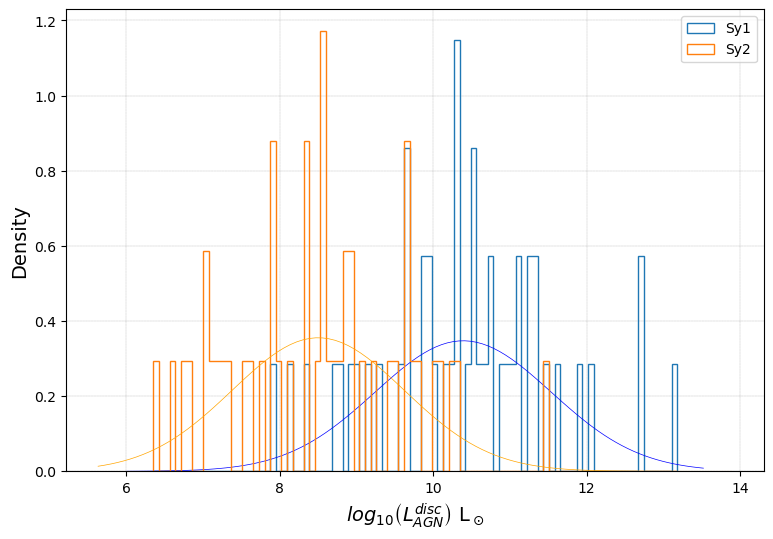

In [58]:
L_Sy1 = Ne_Sy1['log_bayes.agn.disk_luminosity']
L_Sy2 = Ne_Sy2['log_bayes.agn.disk_luminosity']
bins_Sy = np.linspace(min(Ne_Sy['log_bayes.agn.disk_luminosity']),max(Ne_Sy['log_bayes.agn.disk_luminosity']),len(Ne_Sy))
plt.figure(figsize=(9,6))
plt.hist(L_Sy1, bins=bins_Sy, density=True, histtype='step', label='Sy1')
# Plot the PDF.
mu1, std1 = norm.fit(L_Sy1)
xmin1, xmax1 = plt.xlim()
x1 = np.linspace(xmin1, xmax1, 100)
p1 = norm.pdf(x1, mu1, std1)
plt.plot(x1, p1, 'b', linewidth=0.5)

plt.hist(L_Sy2, bins=bins_Sy, density=True, histtype='step', label='Sy2')
# Plot the PDF.
mu2, std2 = norm.fit(L_Sy2)
xmin2, xmax2 = plt.xlim()
x2 = np.linspace(xmin2, xmax2, 100)
p2 = norm.pdf(x2, mu2, std2)
plt.plot(x2, p2, 'orange', linewidth=0.5)

plt.xlabel(r'$log_{10}\left(L^{disc}_{AGN}\right)$ L$_\odot$',fontsize=14)
plt.ylabel(r'Density',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.1)
plt.legend()
plt.savefig(path_graphs+'hist_AGN_disc_Lum_Sy.jpg')

### $L^{disc}_{AGN}$ vs Redshift

Ramos et al. (2021) define a separation limit with the median values of the separation between Seyfert type as linear relation:

\begin{equation}
    \log \left(L^{disc}_{AGN} \right) = (9.20 \pm 0.08) + (8.67 \pm 0.61) \times \log(1+z)
\end{equation}

In [59]:
z = np.linspace(min(Ne_Sy['redshift']),max(Ne_Sy['redshift']),len(Ne_Sy))
L = 9.20 + 8.67*np.log10(1+z)
L_u = (9.20-0.08) + (8.67-0.61)*np.log10(1+z)
L_o = (9.20+0.08) + (8.67+0.61)*np.log10(1+z)
len(L)

95

**According their classification as Sy1 and Sy2 from SIMBAD Data Base:**

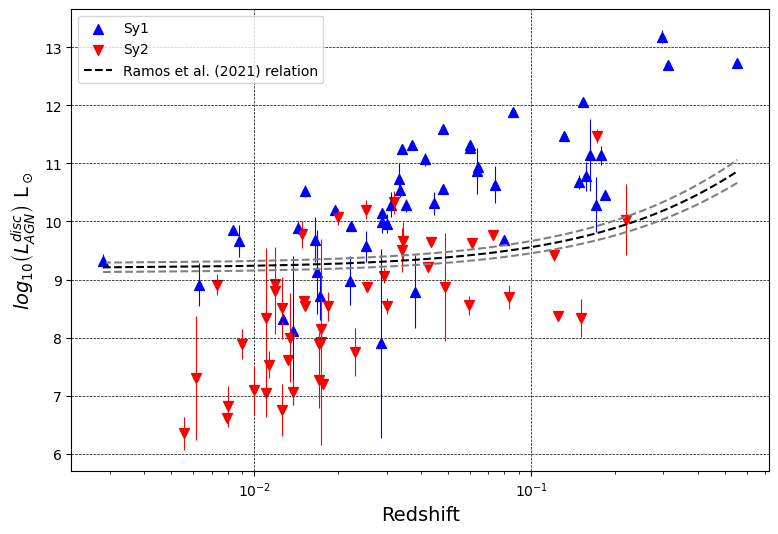

In [60]:
plt.figure(figsize=(9,6))
plt.scatter(Ne_Sy1['redshift'],Ne_Sy1['log_bayes.agn.disk_luminosity'],50,color='blue',marker = '^',\
            label='Sy1')
plt.errorbar(Ne_Sy1['redshift'],Ne_Sy1['log_bayes.agn.disk_luminosity'],\
             Ne_Sy1['log_bayes.agn.disk_luminosity_err'],elinewidth=0.8,fmt='b.')
plt.scatter(Ne_Sy2['redshift'], Ne_Sy2['log_bayes.agn.disk_luminosity'],50,color='red', marker = 'v',\
            label='Sy2')
plt.errorbar(Ne_Sy2['redshift'],Ne_Sy2['log_bayes.agn.disk_luminosity'],\
             Ne_Sy2['log_bayes.agn.disk_luminosity_err'],elinewidth=0.8,fmt='r.')

plt.plot(z,L,ls='--',color='black',label='Ramos et al. (2021) relation')
plt.plot(z,L_u,ls='--',color='gray')
plt.plot(z,L_o,ls='--',color='gray')

plt.xlabel(r'Redshift',fontsize=14)
plt.xscale('log')
plt.ylabel(r'$log_{10}\left(L^{disc}_{AGN}\right)$ L$_\odot$',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig(path_graphs+'AGN_disc_L_vs_reshift_Sy.jpg')

**According the classification of the viewing angle:**

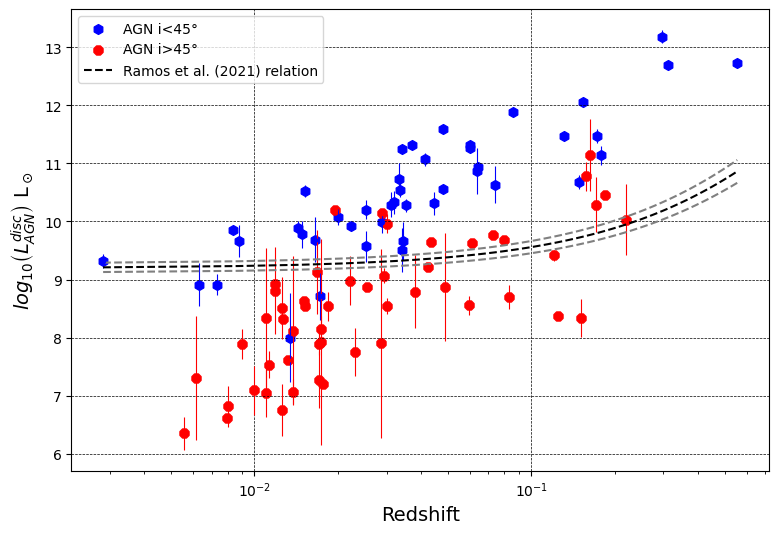

In [61]:
plt.figure(figsize=(9,6))
plt.scatter(AGN_T1['redshift'],AGN_T1['log_bayes.agn.disk_luminosity'],50,color='blue',marker = 'h',\
            label='AGN i<45°')
plt.errorbar(AGN_T1['redshift'],AGN_T1['log_bayes.agn.disk_luminosity'],\
             AGN_T1['log_bayes.agn.disk_luminosity_err'],elinewidth=0.8,fmt='b.')
plt.scatter(AGN_T2['redshift'], AGN_T2['log_bayes.agn.disk_luminosity'],50,color='red', marker = '8',\
            label='AGN i>45°')
plt.errorbar(AGN_T2['redshift'],AGN_T2['log_bayes.agn.disk_luminosity'],\
             AGN_T2['log_bayes.agn.disk_luminosity_err'],elinewidth=0.8,fmt='r.')

plt.plot(z,L,ls='--',color='black',label='Ramos et al. (2021) relation')
plt.plot(z,L_u,ls='--',color='gray')
plt.plot(z,L_o,ls='--',color='gray')

plt.xlabel(r'Redshift',fontsize=14)
plt.xscale('log')
plt.ylabel(r'$log_{10}\left(L^{disc}_{AGN}\right)$ L$_\odot$',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig(path_graphs+'AGN_disc_L_vs_reshift_i.jpg')

### Classifying the galaxies by their AGN disc luminosity:

In [62]:
AGN_T1_L = Ne_Sy[Ne_Sy['log_bayes.agn.disk_luminosity'] > 9.20 + 8.67*np.log10(1+Ne_Sy['redshift'])]
AGN_T2_L = Ne_Sy[Ne_Sy['log_bayes.agn.disk_luminosity'] < 9.20 + 8.67*np.log10(1+Ne_Sy['redshift'])]

df_AGN_T1_L = AGN_T1_L.to_pandas()
df_AGN_T2_L = AGN_T2_L.to_pandas()

In [63]:
print('For the',len(AGN_T1_L),'galaxies with their AGN disc luminosity > than the Ramos et al. (2021) luminosity \
relation,',len(AGN_T1_L[AGN_T1_L['otype']=='Sy1']),'\nare Seyfert1 and',len(AGN_T1[AGN_T1['otype']=='Sy2']),\
      'are Seyfert2')

print('For the',len(AGN_T2_L),'galaxies with their AGN disc luminosity < than the Ramos et. al (2021) lumionosity \
relation,',len(AGN_T2_L[AGN_T2_L['otype']=='Sy2']),'\nare Seyfert2 and',len(AGN_T2_L[AGN_T2_L['otype']=='Sy1']),\
      'are Seyfert1')

For the 51 galaxies with their AGN disc luminosity > than the Ramos et al. (2021) luminosity relation, 40 
are Seyfert1 and 9 are Seyfert2
For the 44 galaxies with their AGN disc luminosity < than the Ramos et. al (2021) lumionosity relation, 36 
are Seyfert2 and 8 are Seyfert1


Just to check if we did the classification correctly, we will graph again the $L^{disc}_{AGN}$ vs Redshift:

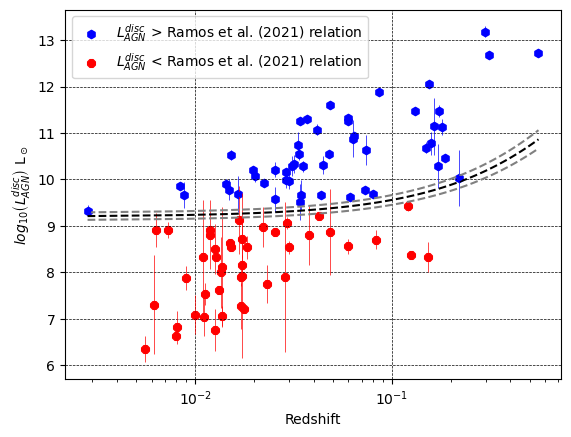

In [64]:
plt.figure()
plt.scatter(AGN_T1_L['redshift'],AGN_T1_L['log_bayes.agn.disk_luminosity'],color='blue',marker = 'h',\
            label=r'$L^{disc}_{AGN}$ > Ramos et al. (2021) relation')
plt.errorbar(AGN_T1_L['redshift'],AGN_T1_L['log_bayes.agn.disk_luminosity'],\
             AGN_T1_L['log_bayes.agn.disk_luminosity_err'],elinewidth=0.5,fmt='b.')
plt.scatter(AGN_T2_L['redshift'], AGN_T2_L['log_bayes.agn.disk_luminosity'], color='red', marker = '8',\
            label=r'$L^{disc}_{AGN}$ < Ramos et al. (2021) relation')
plt.errorbar(AGN_T2_L['redshift'],AGN_T2_L['log_bayes.agn.disk_luminosity'],\
             AGN_T2_L['log_bayes.agn.disk_luminosity_err'],elinewidth=0.5,fmt='r.')

plt.plot(z,L,ls='--',color='black')
plt.plot(z,L_u,ls='--',color='gray')
plt.plot(z,L_o,ls='--',color='gray')

plt.xlabel(r'Redshift')
plt.xscale('log')
plt.ylabel(r'$log_{10}\left(L^{disc}_{AGN}\right)$ L$_\odot$')
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()

### [NeV]/[NeII] vs $f_{AGN}$ by their AGN disc luminosity:

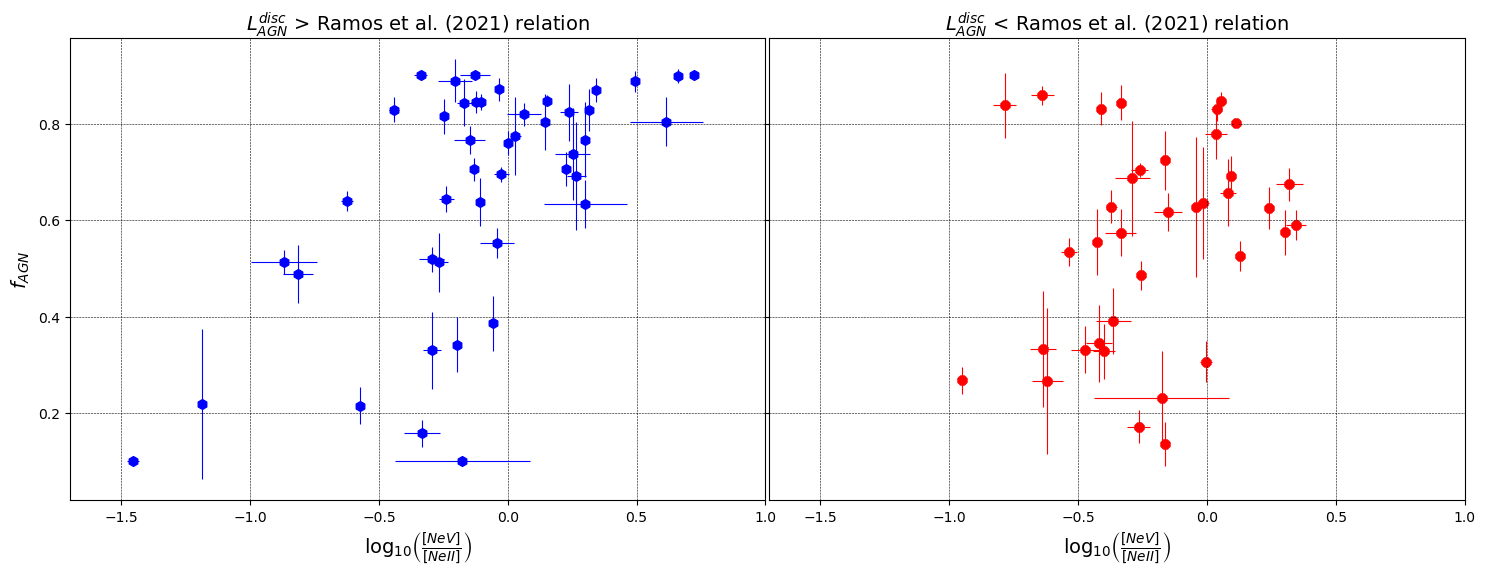

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),sharey=True)
#fig.suptitle(r'$f_{AGN}$ vs $\frac{[NeV]}{[NeII]}$', fontsize=16)
ax1.scatter(AGN_T1_L['log_[NeV]/[NeII]'],AGN_T1_L['bayes.agn.fracAGN'],50,color='blue',marker = 'h')
ax1.errorbar(AGN_T1_L['log_[NeV]/[NeII]'], AGN_T1_L['bayes.agn.fracAGN'],\
             AGN_T1_L['bayes.agn.fracAGN_err'], AGN_T1_L['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='b.')
ax1.set_xlim(-1.7,1)
ax1.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_ylabel(r'$f_{AGN}$', fontsize=14)
ax1.set_title(r'$L^{disc}_{AGN}$ > Ramos et al. (2021) relation', fontsize=14)
ax2.scatter(AGN_T2_L['log_[NeV]/[NeII]'], AGN_T2_L['bayes.agn.fracAGN'],50, color='red', marker = '8')
ax2.errorbar(AGN_T2_L['log_[NeV]/[NeII]'], AGN_T2_L['bayes.agn.fracAGN'],\
             AGN_T2_L['bayes.agn.fracAGN_err'], AGN_T2_L['log_[NeV]/[NeII]_err'],elinewidth=0.8,fmt='r.')
ax2.set_xlim(-1.7,1)
ax2.set_xlabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax2.set_title(r'$L^{disc}_{AGN}$ < Ramos et al. (2021) relation', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots

In [66]:
NeVNeII_corr_AGNT1_L = df_AGN_T1_L['log_[NeV]/[NeII]'].corr(df_AGN_T1_L['bayes.agn.fracAGN'])
NeVNeII_corr_AGNT2_L = df_AGN_T2_L['log_[NeV]/[NeII]'].corr(df_AGN_T2_L['bayes.agn.fracAGN'])

print('Pearson\'s correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:')
print('AGN disc luminosty > Ramos et al. 2021 adjusment: ',NeVNeII_corr_AGNT1_L)
print('AGN disc luminosty < Ramos et al. 2021 adjusment: ',NeVNeII_corr_AGNT2_L)

Pearson's correlation coefficient between [NeV]/[NeII] ratio and AGN fraction:
AGN disc luminosty > Ramos et al. 2021 adjusment:  0.6273831595206586
AGN disc luminosty < Ramos et al. 2021 adjusment:  0.26208150585004863


In [67]:
NeVNeII_fracAGN_AGNT1_L = BootstrapCorr(10000,0.8,df_AGN_T1_L,'log_[NeV]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 41 of 51
Number of samples: 10000
Median: 0.6299676985112636
Mean: 0.6179234616676451
Variance: 0.011461854473187297
Standard Desviation: 0.10706005078079917
90% confidence interval: 0.4274789385205138 - 0.7741536511488234


In [68]:
NeVNeII_fracAGN_AGNT2_L = BootstrapCorr(10000,0.8,df_AGN_T2_L,'log_[NeV]/[NeII]','bayes.agn.fracAGN')

Bootstraps results for the correlation coefficient between log_[NeV]/[NeII] y bayes.agn.fracAGN :
Samples lenght: 35 of 44
Number of samples: 10000
Median: 0.2680447600381237
Mean: 0.26506126496528215
Variance: 0.0312995456377327
Standard Desviation: 0.17691677602119224
90% confidence interval: -0.03008149049313511 - 0.5494505297265889


--------------------------

## $L^{disc}_{AGN}$ vs $i$

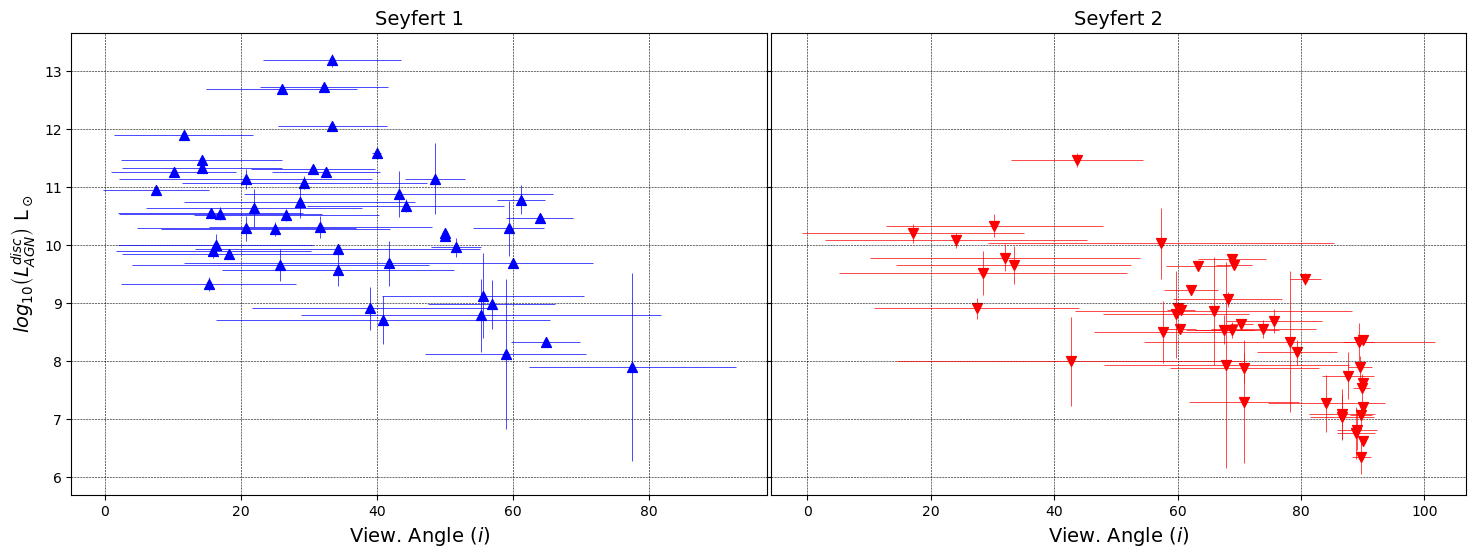

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6),sharey=True)
#fig.suptitle(r'$f_{AGN}$ vs $\frac{[NeV]}{[NeII]}$', fontsize=16)
ax1.scatter(Ne_Sy1['bayes.agn.i'],Ne_Sy1['log_bayes.agn.disk_luminosity'],50,color='blue',marker = '^')
ax1.errorbar(Ne_Sy1['bayes.agn.i'], Ne_Sy1['log_bayes.agn.disk_luminosity'],\
             Ne_Sy1['log_bayes.agn.disk_luminosity_err'], Ne_Sy1['bayes.agn.i_err'],elinewidth=0.5,fmt='b.')
#ax1.set_xlim(-1.7,1)
ax1.set_xlabel(r'View. Angle ($i$)', fontsize=14)
ax1.set_ylabel(r'$log_{10}\left(L^{disc}_{AGN}\right)$ L$_\odot$', fontsize=14)
ax1.set_title(r'Seyfert 1', fontsize=14)
ax2.scatter(Ne_Sy2['bayes.agn.i'], Ne_Sy2['log_bayes.agn.disk_luminosity'],50, color='red', marker = 'v')
ax2.errorbar(Ne_Sy2['bayes.agn.i'], Ne_Sy2['log_bayes.agn.disk_luminosity'],\
             Ne_Sy2['log_bayes.agn.disk_luminosity_err'], Ne_Sy2['bayes.agn.i_err'],elinewidth=0.5,fmt='r.')
#ax2.set_xlim(-1.7,1)
ax2.set_xlabel(r'View. Angle ($i$)', fontsize=14)
ax2.set_title(r'Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.005) #Space between subplots

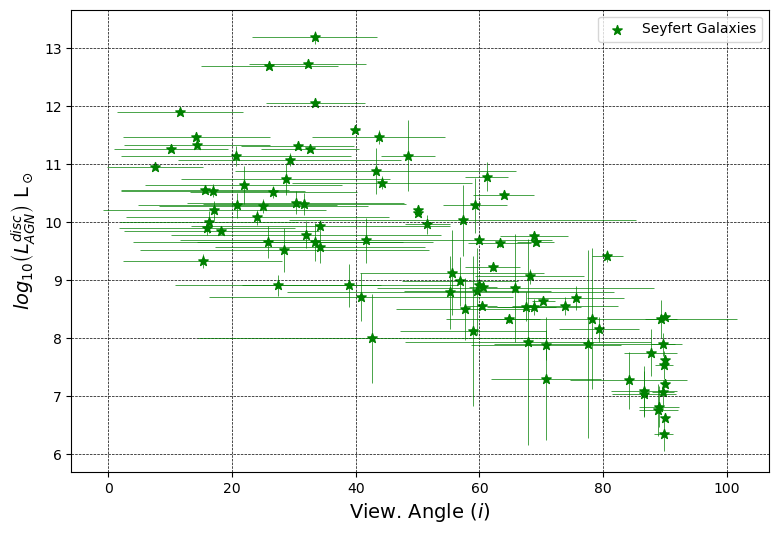

In [70]:
plt.figure(figsize=(9,6))
plt.scatter(Ne_Sy['bayes.agn.i'],Ne_Sy['log_bayes.agn.disk_luminosity'],50,color='green',marker = '*',\
            label=r'Seyfert Galaxies')
plt.errorbar(Ne_Sy['bayes.agn.i'],Ne_Sy['log_bayes.agn.disk_luminosity'],\
             Ne_Sy['log_bayes.agn.disk_luminosity_err'],Ne_Sy['bayes.agn.i_err'],elinewidth=0.5,fmt='g.')
plt.xlabel(r'View. Angle ($i$)',fontsize=14)
#plt.xscale('log')
plt.ylabel(r'$log_{10}\left(L^{disc}_{AGN}\right)$ L$_\odot$',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()

Bootstraps results for the correlation coefficient between bayes.agn.i y log_bayes.agn.disk_luminosity :
Samples lenght: 76 of 95
Number of samples: 10000
Median: -0.7772975621596473
Mean: -0.7745537467344766
Variance: 0.0015111219331767874
Standard Desviation: 0.038873151829724166
90% confidence interval: -0.8334347532967126 - -0.7077849419243272


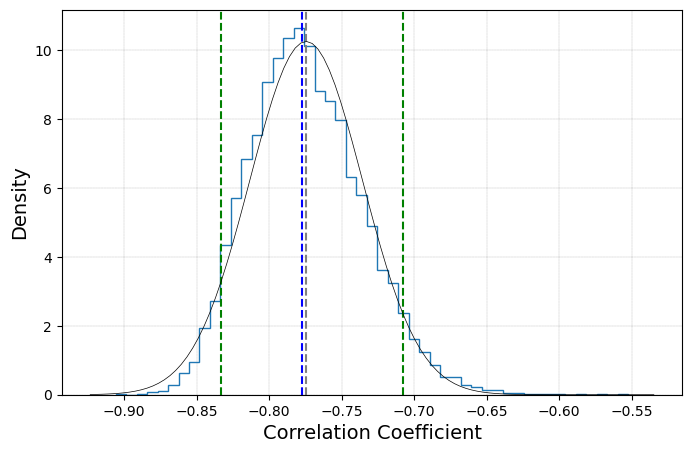

In [81]:
LAGNdisc_i_Sy = BootstrapCorr(10000,0.8,df_Ne_Sy,'bayes.agn.i','log_bayes.agn.disk_luminosity',histo=True)

---------------------------

## Skymap

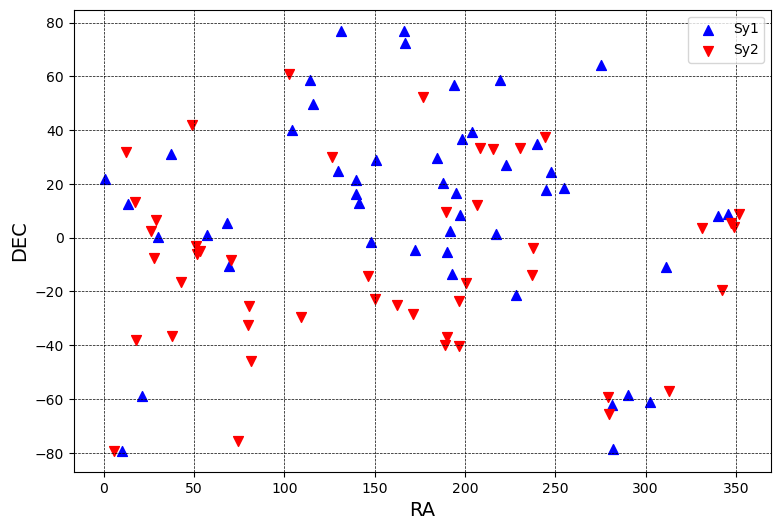

In [71]:
plt.figure(figsize=(9,6))
plt.scatter(Ne_Sy1['RA'], Ne_Sy1['DEC'],50,color='blue', marker = '^', label='Sy1')
plt.scatter(Ne_Sy2['RA'], Ne_Sy2['DEC'],50,color='red', marker = 'v', label='Sy2')
plt.xlabel(r'RA', fontsize=14)
plt.ylabel(r'DEC', fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

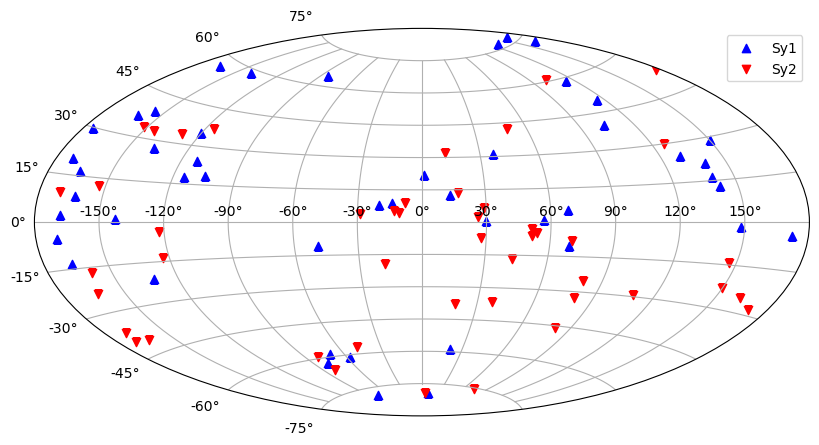

In [72]:
coordinates_Sy1= SkyCoord(ra=Ne_Sy1['RA'], dec=Ne_Sy1['DEC'],unit='deg',frame='icrs')
coordinates_Sy2= SkyCoord(ra=Ne_Sy2['RA'], dec=Ne_Sy2['DEC'],unit='deg',frame='icrs')

plt.figure(figsize=(10,7))
plt.subplot(111, projection='aitoff')
plt.grid(True)
plt.scatter(coordinates_Sy1.ra.wrap_at('180d').radian, coordinates_Sy1.dec.radian,\
            color='blue', marker = '^', label='Sy1')
plt.scatter(coordinates_Sy2.ra.wrap_at('180d').radian, coordinates_Sy2.dec.radian,\
            color='red', marker = 'v', label='Sy2')
plt.legend()
plt.show()

## Redshift Distribution

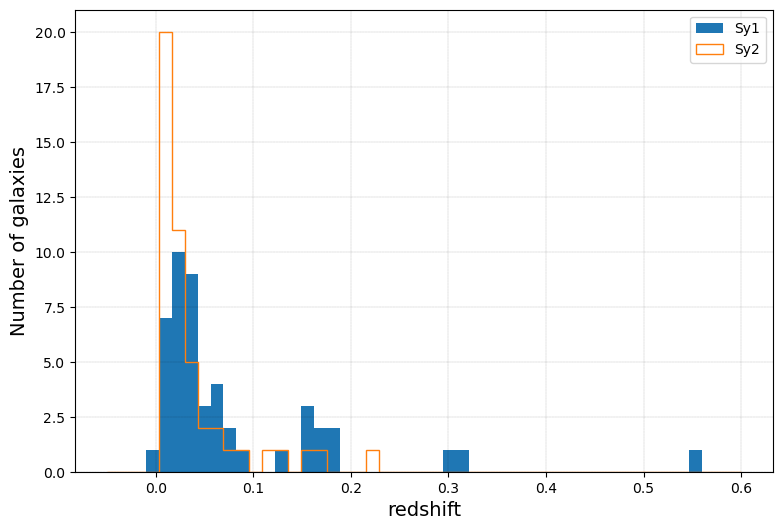

In [73]:
z_Sy1 = Ne_Sy1['redshift']
z_Sy2 = Ne_Sy2['redshift']
#z_SyG = Ne_SyG['redshift']
bins_Sy = np.linspace(-0.05,0.6,50)
plt.figure(figsize=(9,6))
plt.hist(z_Sy1, bins=bins_Sy, label='Sy1')
plt.hist(z_Sy2, bins=bins_Sy, histtype='step', label='Sy2')
plt.xlabel('redshift',fontsize=14)
plt.ylabel(r'Number of galaxies',fontsize=14)
plt.grid(color='k', linestyle='--', linewidth=0.1)
#plt.yscale('log')
plt.legend()

In [74]:
print('Min redshift value for Sy1:',min(z_Sy1),'. Max redshift value for Sy1:',max(z_Sy1))
print('Min redshift value for Sy2:',min(z_Sy2),'. Max redshift value for Sy2:',max(z_Sy2))

Min redshift value for Sy1: 0.002838630450136274 . Max redshift value for Sy1: 0.55517
Min redshift value for Sy2: 0.005554 . Max redshift value for Sy2: 0.22


---------------------------
## Alternative graphic for [NeV/NeII] vs AGN Frac:

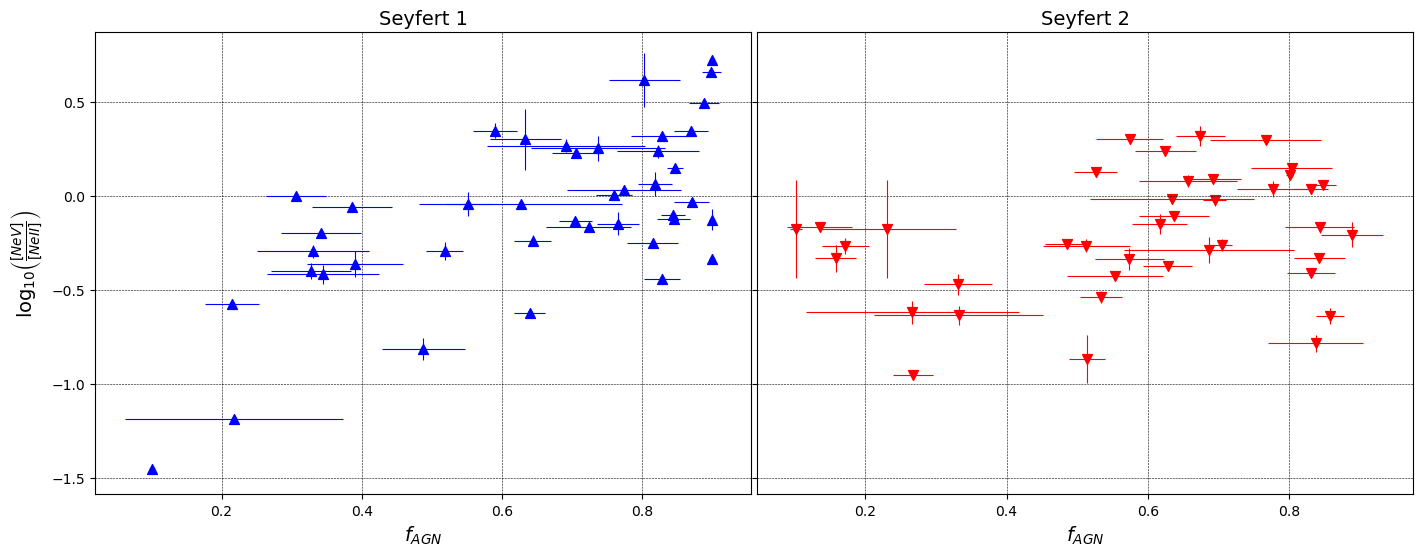

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,6),sharey=True)
#fig.suptitle(r'$\frac{[NeV]}{[NeII]}$ vs $f_{AGN}$', fontsize=16)
ax1.scatter(NeVNeII_Sy1['bayes.agn.fracAGN'],NeVNeII_Sy1['log_[NeV]/[NeII]'],50,color='blue',marker = '^')
ax1.errorbar(NeVNeII_Sy1['bayes.agn.fracAGN'], NeVNeII_Sy1['log_[NeV]/[NeII]'],\
             NeVNeII_Sy1['log_[NeV]/[NeII]_err'], NeVNeII_Sy1['bayes.agn.fracAGN_err'],elinewidth=0.8,fmt='b.')
ax1.set_xlabel(r'$f_{AGN}$', fontsize=14)
ax1.set_ylabel(r'$\log_{10}\left(\frac{[NeV]}{[NeII]}\right)$', fontsize=14)
ax1.set_title('Seyfert 1', fontsize=14)
ax2.scatter(NeVNeII_Sy2['bayes.agn.fracAGN'], NeVNeII_Sy2['log_[NeV]/[NeII]'],50, color='red', marker = 'v')
ax2.errorbar(NeVNeII_Sy2['bayes.agn.fracAGN'], NeVNeII_Sy2['log_[NeV]/[NeII]'], \
             NeVNeII_Sy2['log_[NeV]/[NeII]_err'], NeVNeII_Sy2['bayes.agn.fracAGN_err'],elinewidth=0.8,fmt='r.')
ax2.set_xlabel(r'$f_{AGN}$', fontsize=14)
ax2.set_title('Seyfert 2', fontsize=14)
ax1.grid(color='k', linestyle='--', linewidth=0.4)
ax2.grid(color='k', linestyle='--', linewidth=0.4)
plt.subplots_adjust(wspace=0.01) #Space between subplots

---------------------------------------

## Final numbers

In [76]:
date_sample = 'Sep_02_2022'
simbad_sample_Sy = Table.read(path_raw+'SMB_'+date_sample+'_Sy_Samples'+'.vot',format='votable') 
NeIR_Sy = Table.read(path_raw+'Obj_Sy_Ne-IR_'+date_sample+'.vot',format='votable')
CIG_BadGalaxies = Table.read('../Datos/Complementary/CIGPhot_BadEnergyBalance.tbl', format='ascii')
CIG = Table.read(path_FINAL+'CIGPhot_EnergyBal_All.tbl', format='ascii')
out0to90 = Table.read(path_CIGALE_out+'results0a90_All.fits', format='fits')

In [77]:
print('From the',len(simbad_sample_Sy),'Seyfert Galaxies from the SIMBAD sample,',len(NeIR_Sy),'have information\n\
of Neon lines ([NeII],[NeIII] or [NeV]).\n') 

print('After remove',len(CIG_BadGalaxies),'galaxies with bad energy balance coverage, the total of galaxies \n\
to model and fit their SEDs in CIGALE was',len(CIG),'.\n')

print(r'Cleaining the',len(CIG),'galaxies from CIGALE results of the galaxies with bad fittings \n\
and a bad constrained SFR (\'pcigale.ini\' setup i = 0 to 90),',len(CIG)-len(out0to90),'galaxies \n\
was removed leaving a total of',len(out0to90),'galaxies\n')

print('Of this',len(out0to90),'galaxies, only',len(Ne_Sy),'have information from at least two different \n\
Neon spectral lines with the same bibcodes to calcule the spectral line ratios\n')

print('From the', len(Ne_Sy),'galaxies:',len(NeVNeII_Sy),'galaxies have [NeV]/[NeII] info,')
print(len(NeVNeIII_Sy),'galaxies have [NeV]/[NeIII] info and',len(NeIIINeII_Sy),'galaxies have [NeIII]/[NeII] info')

From the 44270 Seyfert Galaxies from the SIMBAD sample, 303 have information
of Neon lines ([NeII],[NeIII] or [NeV]).

After remove 51 galaxies with bad energy balance coverage, the total of galaxies 
to model and fit their SEDs in CIGALE was 252 .

Cleaining the 252 galaxies from CIGALE results of the galaxies with bad fittings 
and a bad constrained SFR ('pcigale.ini' setup i = 0 to 90), 134 galaxies 
was removed leaving a total of 118 galaxies

Of this 118 galaxies, only 95 have information from at least two different 
Neon spectral lines with the same bibcodes to calcule the spectral line ratios

From the 95 galaxies: 82 galaxies have [NeV]/[NeII] info,
80 galaxies have [NeV]/[NeIII] info and 83 galaxies have [NeIII]/[NeII] info


-------------------------------------
## Notebook Info

In [78]:
%reload_ext watermark
%watermark -a "Jonhatan Bernal" -d -v -m
print('Specific Python packages')
%watermark -iv -w --packages astropy

Author: Jonhatan Bernal

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 7.31.1

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.15.0-58-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
astropy: 5.1

astropy   : 5.1
numpy     : 1.21.5
pandas    : 1.4.4
matplotlib: 3.5.2

Watermark: 2.3.1



-----------------------------------------
### Cells for test

0.7185629394638755
0.7093413270266036
0.089351149403593
0.5467564646086934 - 0.8403436612166242


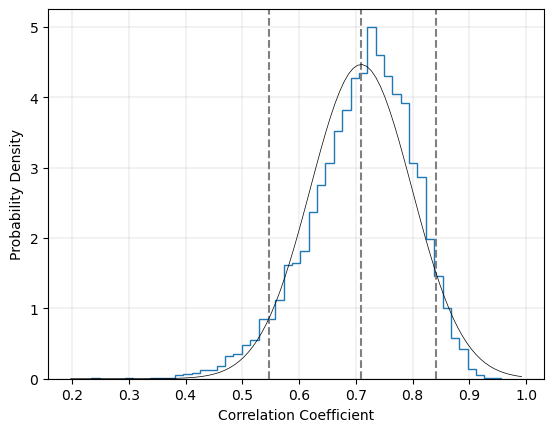

In [79]:
corrdata = []
for i in range(10000):
    sample = df_NeVNeII_Sy2.sample(frac=0.8,replace=True)
    corr = np.log10(sample['redshift']).corr(sample['log_bayes.agn.disk_luminosity'])
    corrdata.append(corr)

mu, std = norm.fit(corrdata)

bins = np.linspace(min(corrdata), max(corrdata),50)
plt.hist(corrdata, bins=bins, density=True, histtype='step')
plt.axvline(x=np.mean(corrdata),ls='--',color='gray')
plt.axvline(x=np.percentile(corrdata,5),ls='--',color='gray')
plt.axvline(x=np.percentile(corrdata,95),ls='--',color='gray')
plt.xlabel(r'Correlation Coefficient')
plt.ylabel('Probability Density')
plt.grid(color='k', linestyle='--', linewidth=0.1)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=0.5)

print(np.median(corrdata))
print(mu)
print(std)
print(np.percentile(corrdata,5),'-',np.percentile(corrdata,95))

-------------------------------